# **Walmart Sales Forecasting**

# **Problem Statement:**
Sales forecasting is a critical tool for retail organizations, enabling them to align business strategies with demand, optimize inventory, and design effective promotional campaigns. Walmart, a multi-billion-dollar American retail giant, operates over 10,000 stores globally, including more than 4,000 in the United States.

Accurate sales predictions help Walmart efficiently manage stock levels, forecast revenue, and make data-driven investment decisions. Meeting or exceeding sales targets early in the season can boost stock prices and strengthen investor confidence. Conversely, failing to meet projections can negatively impact stock performance, posing significant financial risks for a corporation of Walmart scale.

# **Objective: Building a Data-Driven Sales Forecasting Model**

To predict future sales for Walmart stores based on historical sales data, taking into account store-level features, promotions, and seasonal trends.

In [1]:
# <== Importing Necessary Libraries ==>
import os
import math
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
from google.colab import files
uploaded = files.upload()

Saving merged-data.csv to merged-data.csv


In [102]:
# Loading all datasets
df_features = pd.read_csv('features.csv')
df_store = pd.read_csv('stores.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_features.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0     17  13-08-2010        65.17       2.837        NaN        NaN   
1      4  13-08-2010        78.08       2.698        NaN        NaN   
2     44  13-08-2010        74.93       2.837        NaN        NaN   
3     13  13-08-2010        74.93       2.837        NaN        NaN   
4     10  13-08-2010        88.37       3.049        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5      CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  126.064          6.70      False  
1        NaN        NaN        NaN  126.064          7.37      False  
2        NaN        NaN        NaN  126.064          7.80      False  
3        NaN        NaN        NaN  126.064          7.95      False  
4        NaN        NaN        NaN  126.064          9.20      False

In [5]:
pd.options.display.max_rows=100
pd.pandas.set_option('display.max_columns', None)

# **Dataset Description**

**features.csv** – Contains additional data related to stores, departments, and regional activities for specific dates.

**train.csv** – Historical sales data covering the period from February 5, 2010, to August 17, 2012.

**test.csv** – Similar to train.csv, but used for predicting weekly sales.

**stores.csv** – Includes anonymized details of 45 stores, such as their type and size.


In [6]:
# lowercase all the column names and replace spaces with _
df_train.columns = df_train.columns.str.lower().str.replace(' ', '_')
df_store.columns = df_store.columns.str.lower().str.replace(' ', '_')
df_features.columns = df_features.columns.str.lower().str.replace(' ', '_')

# **Exploring - Features.csv**

In [7]:
print("Shape of dataset (rows x columns):", df_features.shape)

Shape of dataset (rows x columns): (8190, 12)


In [8]:
df_features.head(10)

store        date  temperature  fuel_price  markdown1  markdown2  \
0     17  13-08-2010        65.17       2.837        NaN        NaN   
1      4  13-08-2010        78.08       2.698        NaN        NaN   
2     44  13-08-2010        74.93       2.837        NaN        NaN   
3     13  13-08-2010        74.93       2.837        NaN        NaN   
4     10  13-08-2010        88.37       3.049        NaN        NaN   
5     42  13-08-2010        88.37       3.049        NaN        NaN   
6     33  13-08-2010        95.57       3.049        NaN        NaN   
7     34  13-08-2010        76.72       2.698        NaN        NaN   
8     12  13-08-2010        87.01       3.159        NaN        NaN   
9     28  13-08-2010        87.01       3.159        NaN        NaN   

   markdown3  markdown4  markdown5      cpi  unemployment  isholiday  
0        NaN        NaN        NaN  126.064          6.70      False  
1        NaN        NaN        NaN  126.064          7.37      False  
2        NaN        NaN        NaN  126.064          7.80      False  
3        NaN        NaN        NaN  126.064          7.95      False  
4        NaN        NaN        NaN  126.064          9.20      False  
5        NaN        NaN        NaN  126.064          9.20      False  
6        NaN        NaN        NaN  126.064          9.50      False  
7        NaN        NaN        NaN  126.064          9.82      False  
8        NaN        NaN        NaN  126.064         14.18      False  
9        NaN        NaN        NaN  126.064         14.18      False

In [9]:
df_features.head(-10)

store        date  temperature  fuel_price  markdown1  markdown2  \
0        17  13-08-2010        65.17       2.837        NaN        NaN   
1         4  13-08-2010        78.08       2.698        NaN        NaN   
2        44  13-08-2010        74.93       2.837        NaN        NaN   
3        13  13-08-2010        74.93       2.837        NaN        NaN   
4        10  13-08-2010        88.37       3.049        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8175     39  26-07-2013        83.84       3.620   12682.46    1094.97   
8176      5  26-07-2013        84.16       3.620     131.42      35.39   
8177      6  26-07-2013        84.42       3.620     543.69     798.02   
8178     21  26-07-2013        85.00       3.620    1025.38     928.07   
8179     30  26-07-2013        85.00       3.620      35.08        NaN   

      markdown3  markdown4  markdown5      cpi  unemployment  isholiday  
0           NaN        NaN        NaN  126.064          6.70      False  
1           NaN        NaN        NaN  126.064          7.37      False  
2           NaN        NaN        NaN  126.064          7.80      False  
3           NaN        NaN        NaN  126.064          7.95      False  
4           NaN        NaN        NaN  126.064          9.20      False  
...         ...        ...        ...      ...           ...        ...  
8175      21.85     170.61    2779.41      NaN           NaN      False  
8176       0.09        NaN     948.51      NaN           NaN      False  
8177      16.05      70.40    2648.37      NaN           NaN      False  
8178       4.00      97.85    2549.08      NaN           NaN      False  
8179       0.50        NaN     525.63      NaN           NaN      False  

[8180 rows x 12 columns]

In [10]:
# Display column names
print(df_features.columns)

Index(['store', 'date', 'temperature', 'fuel_price', 'markdown1', 'markdown2',
       'markdown3', 'markdown4', 'markdown5', 'cpi', 'unemployment',
       'isholiday'],
      dtype='object')


**Column-wise Description**

- Store – Store number identifier.

- Date – Date of the record (ranging from 2010 to 2012).

- Temperature – Temperature in Fahrenheit on that day.

- Fuel_Price – Price of fuel on the given day.

- Markdown1, Markdown2, Markdown3, Markdown4 – Anonymized data related to promotional markdowns at Walmart.

- CPI (Consumer Price Index) – Measures monthly changes in prices paid by U.S. consumers.

- Unemployment – Unemployment rate in the region.

- IsHoliday – Indicates whether the given date is a holiday (True) or a working day (False)

In [11]:
# Display summary information about the dataset
print(df_features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         8190 non-null   int64  
 1   date          8190 non-null   object 
 2   temperature   8190 non-null   float64
 3   fuel_price    8190 non-null   float64
 4   markdown1     4032 non-null   float64
 5   markdown2     2921 non-null   float64
 6   markdown3     3613 non-null   float64
 7   markdown4     3464 non-null   float64
 8   markdown5     4050 non-null   float64
 9   cpi           7605 non-null   float64
 10  unemployment  7605 non-null   float64
 11  isholiday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None


In [12]:
# Check for missing values
print(df_features.isna().sum())

store              0
date               0
temperature        0
fuel_price         0
markdown1       4158
markdown2       5269
markdown3       4577
markdown4       4726
markdown5       4140
cpi              585
unemployment     585
isholiday          0
dtype: int64


In [13]:
# Display statistical summary of the dataset
print(df_features.describe())

             store  temperature   fuel_price      markdown1      markdown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           markdown3     markdown4      markdown5          cpi  unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.827231  
std     11276.462208   6792.329861   13086.690278    39.7383

In [14]:
# Number of unique values
df_features.nunique()

store             45
date             182
temperature     4178
fuel_price      1011
markdown1       4023
markdown2       2715
markdown3       2885
markdown4       3405
markdown5       4045
cpi             2505
unemployment     301
isholiday          2
dtype: int64

# **Data Visualization**

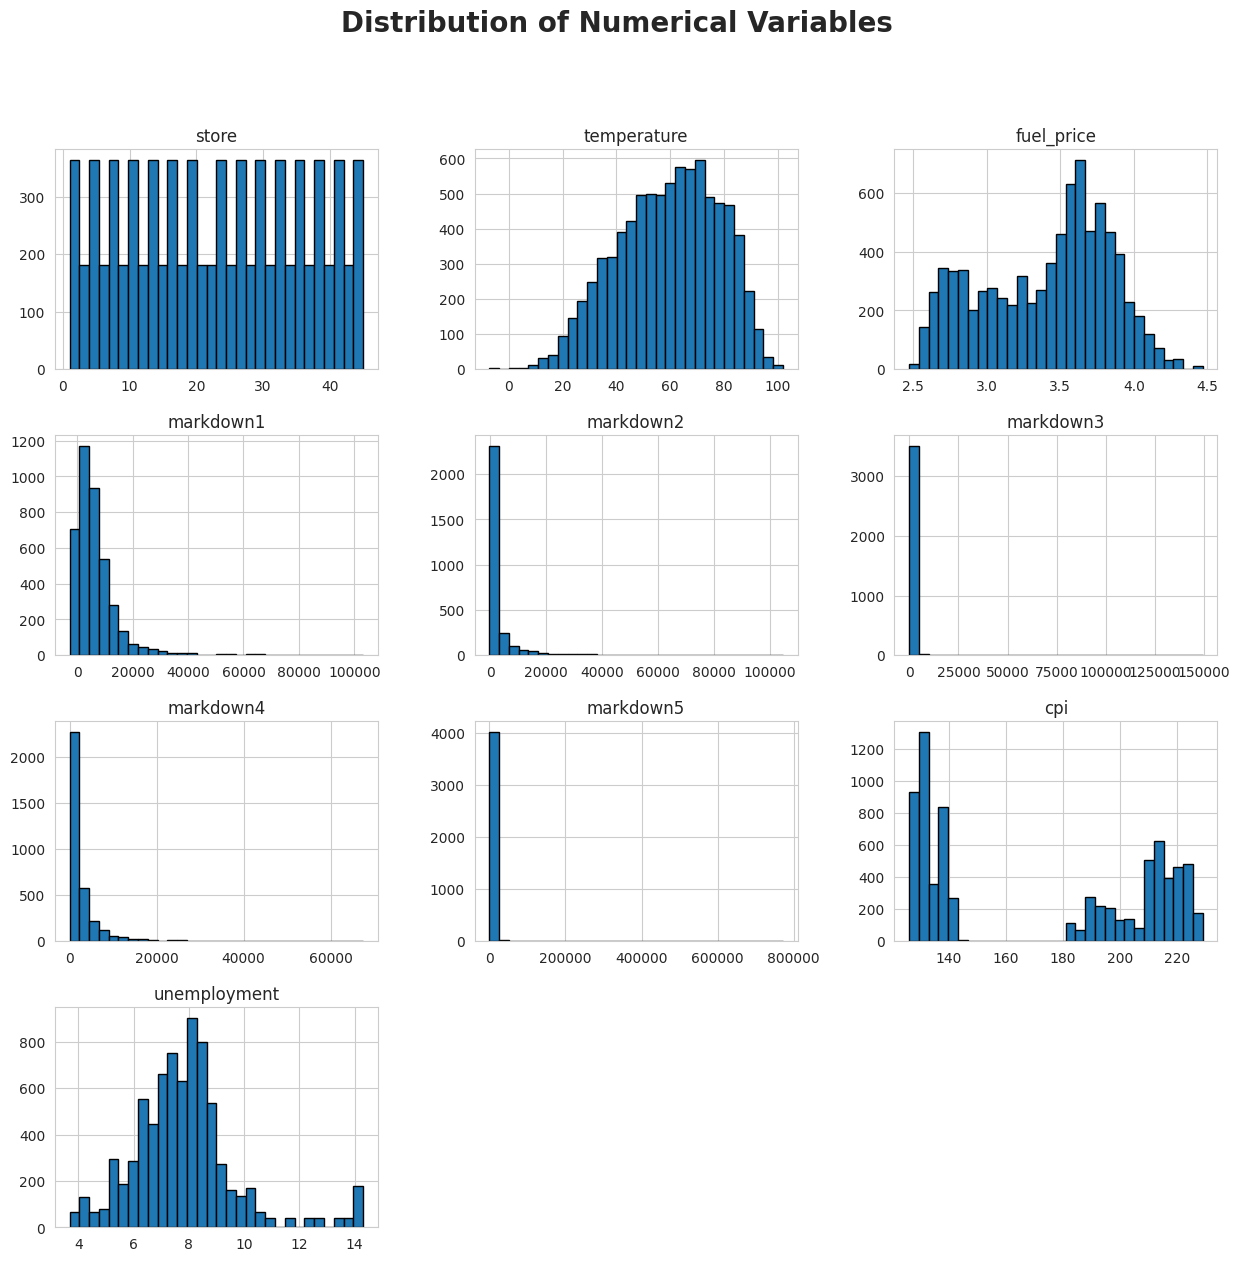

In [15]:
# Setting the plot style
sns.set_style("whitegrid")

# Plot histograms for numerical variables
df_features.hist(bins=30,figsize=(15, 14), edgecolor='black')

# Add a title to the figure
plt.suptitle('Distribution of Numerical Variables', fontsize=20, fontweight='bold')

# Show the plot
plt.show()

<Axes: >

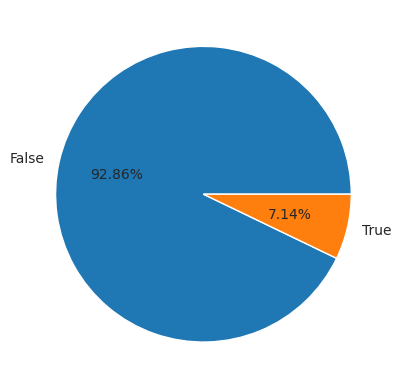

In [16]:
# False: is not a holiday, True: its a holiday
df_features.groupby('isholiday').size().plot(
    kind='pie',
    autopct=lambda p: f'{p:.2f}%'  # Correct way to display percentage
)

# **Unemployment Rate Over Time**

<ipython-input-17-c31e3cba0199>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_features['date'] = pd.to_datetime(df_features['date'])  # Convert to datetime


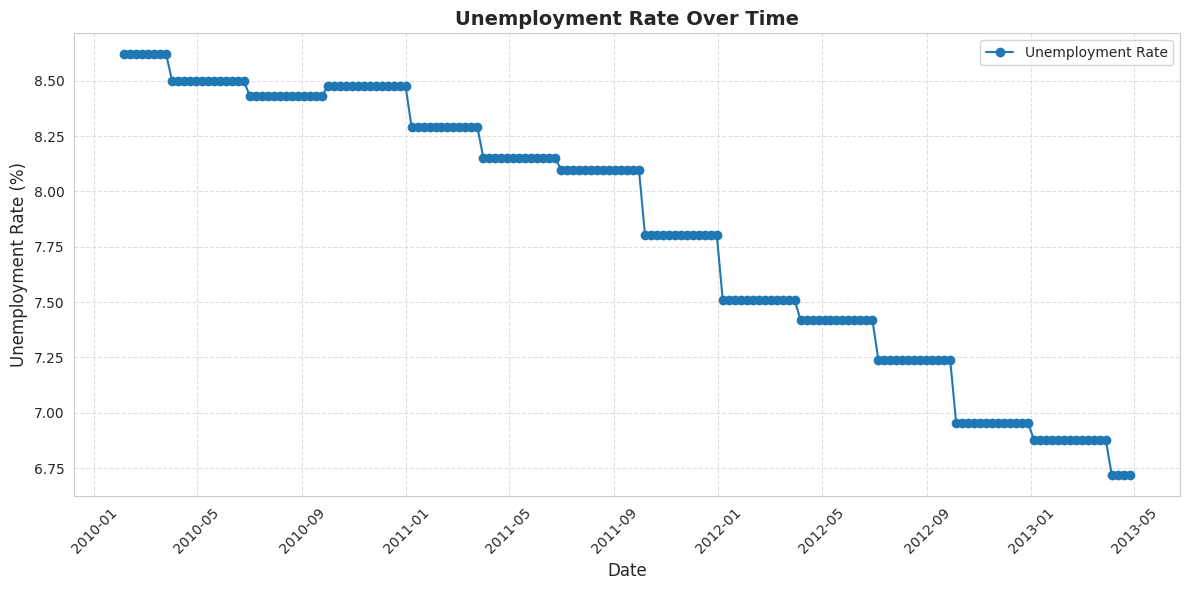

In [17]:
# Convert the 'date' column to datetime format
df_features['date'] = pd.to_datetime(df_features['date'])  # Convert to datetime

# Group by 'date' and calculate the average unemployment rate
df_grouped = df_features.groupby('date', as_index=False)['unemployment'].mean()

# Plot the unemployment rate over time
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['date'], df_grouped['unemployment'], marker='o', linestyle='-', label='Unemployment Rate')

# Enhancing the plot
plt.title('Unemployment Rate Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.6)  # Adding a subtle grid
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# **CPI Index v/s time**

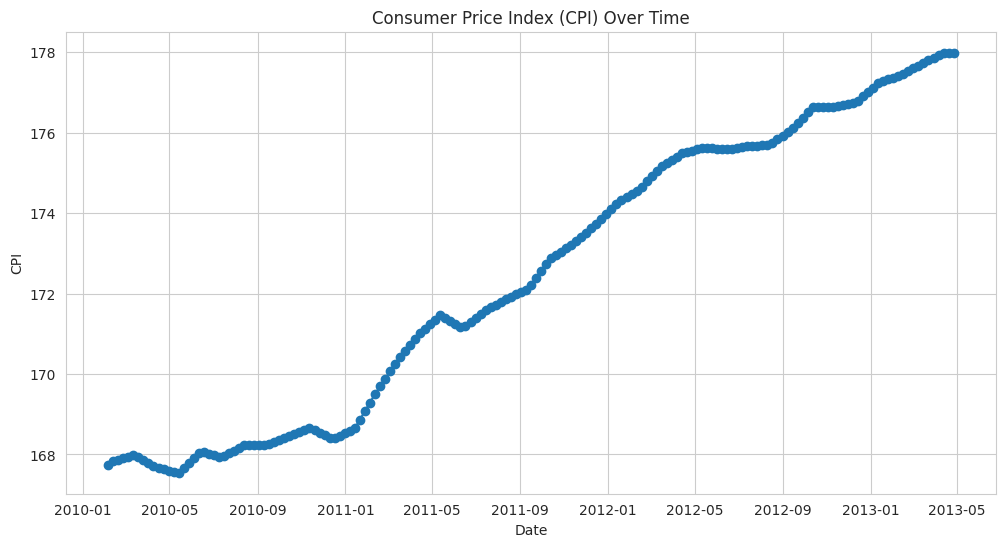

In [18]:
# Group by 'Date' and calculate the average CPI
df_grouped_cpi = df_features.groupby('date')['cpi'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df_grouped_cpi['date'], df_grouped_cpi['cpi'], marker='o', linestyle='-')

# Adding titles and labels
plt.title('Consumer Price Index (CPI) Over Time')
plt.xlabel('Date')
plt.ylabel('CPI')

# Show plot
plt.grid(True)
plt.show()

# **Fuel Price v/s time**

In [19]:
# Group by 'Date' and calculate the average Fuel Price
df_grouped_fuel_price = df_features.groupby('date')['fuel_price'].mean().reset_index()


In [20]:
df_grouped_fuel_price.head()

date  fuel_price
0 2010-02-05    2.717844
1 2010-02-12    2.694022
2 2010-02-19    2.672067
3 2010-02-26    2.683933
4 2010-03-05    2.731200

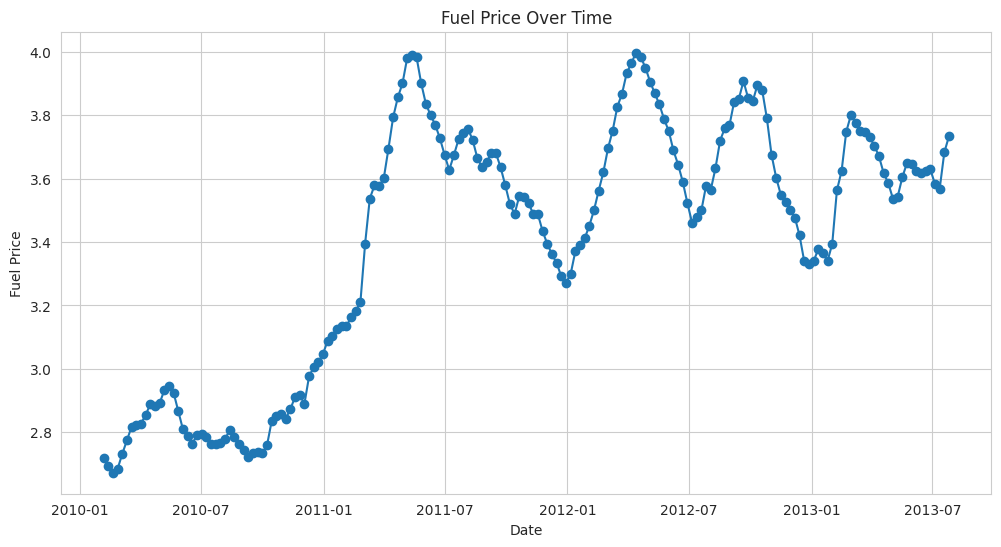

In [21]:
# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df_grouped_fuel_price['date'], df_grouped_fuel_price['fuel_price'], marker='o', linestyle='-')

# x = df_grouped_fuel_price['date'] → Uses the date column for the x-axis (time).
# y = df_grouped_fuel_price['fuel_price'] → Uses the fuel price column for the y-axis (price trend).
# marker='o' → Adds circular markers at each data point.
# linestyle='-' → Connects the points with a solid line.

# Adding titles and labels
plt.title('Fuel Price Over Time')
plt.xlabel('Date')
plt.ylabel('Fuel Price')

# Show plot
plt.grid(True)
plt.show()

# **Normalized Comparison of Unemployment Rate, CPI, and Fuel Price**

In [22]:
# Group by 'date' and calculate the average for each metric
df_grouped = df_features.groupby('date').mean().reset_index()
df_grouped
# Handling missing values using median after grouping
#df_grouped.fillna(df_grouped.median(), inplace=True)

date  store  temperature  fuel_price    markdown1    markdown2  \
0   2010-02-05   23.0    34.037333    2.717844          NaN          NaN   
1   2010-02-12   23.0    34.151333    2.694022          NaN          NaN   
2   2010-02-19   23.0    37.719778    2.672067          NaN          NaN   
3   2010-02-26   23.0    39.243556    2.683933          NaN          NaN   
4   2010-03-05   23.0    42.917333    2.731200          NaN          NaN   
..         ...    ...          ...         ...          ...          ...   
177 2013-06-28   23.0    79.871111    3.629400  4905.673333   766.902703   
178 2013-07-05   23.0    79.655778    3.583533  8197.936444  2192.764054   
179 2013-07-12   23.0    80.798667    3.568111  3962.768444  1259.823947   
180 2013-07-19   23.0    79.268667    3.683444  2607.699333   924.923158   
181 2013-07-26   23.0    78.037333    3.734444   896.289091   795.463947   

      markdown3    markdown4    markdown5         cpi  unemployment  isholiday  
0           NaN          NaN          NaN  167.730885      8.619556        0.0  
1           NaN          NaN          NaN  167.825608      8.619556        1.0  
2           NaN          NaN          NaN  167.871686      8.619556        0.0  
3           NaN          NaN          NaN  167.909657      8.619556        0.0  
4           NaN          NaN          NaN  167.947628      8.619556        0.0  
..          ...          ...          ...         ...           ...        ...  
177   23.950385  3831.422703  3771.952889         NaN           NaN        0.0  
178  626.819070  8357.932564  2389.641333         NaN           NaN        0.0  
179   71.435814  2322.072703  2891.560222         NaN           NaN        0.0  
180  142.733000  1034.775526  1893.073333         NaN           NaN        0.0  
181   41.174167   186.227838  1623.047111         NaN           NaN        0.0  

[182 rows x 12 columns]

In [23]:
df_grouped

date  store  temperature  fuel_price    markdown1    markdown2  \
0   2010-02-05   23.0    34.037333    2.717844          NaN          NaN   
1   2010-02-12   23.0    34.151333    2.694022          NaN          NaN   
2   2010-02-19   23.0    37.719778    2.672067          NaN          NaN   
3   2010-02-26   23.0    39.243556    2.683933          NaN          NaN   
4   2010-03-05   23.0    42.917333    2.731200          NaN          NaN   
..         ...    ...          ...         ...          ...          ...   
177 2013-06-28   23.0    79.871111    3.629400  4905.673333   766.902703   
178 2013-07-05   23.0    79.655778    3.583533  8197.936444  2192.764054   
179 2013-07-12   23.0    80.798667    3.568111  3962.768444  1259.823947   
180 2013-07-19   23.0    79.268667    3.683444  2607.699333   924.923158   
181 2013-07-26   23.0    78.037333    3.734444   896.289091   795.463947   

      markdown3    markdown4    markdown5         cpi  unemployment  isholiday  
0           NaN          NaN          NaN  167.730885      8.619556        0.0  
1           NaN          NaN          NaN  167.825608      8.619556        1.0  
2           NaN          NaN          NaN  167.871686      8.619556        0.0  
3           NaN          NaN          NaN  167.909657      8.619556        0.0  
4           NaN          NaN          NaN  167.947628      8.619556        0.0  
..          ...          ...          ...         ...           ...        ...  
177   23.950385  3831.422703  3771.952889         NaN           NaN        0.0  
178  626.819070  8357.932564  2389.641333         NaN           NaN        0.0  
179   71.435814  2322.072703  2891.560222         NaN           NaN        0.0  
180  142.733000  1034.775526  1893.073333         NaN           NaN        0.0  
181   41.174167   186.227838  1623.047111         NaN           NaN        0.0  

[182 rows x 12 columns]

In [24]:
# Normalize the data using Min-Max Scaling
df_grouped['unemployment_norm'] = (df_grouped['unemployment'] - df_grouped['unemployment'].min()) / (df_grouped['unemployment'].max() - df_grouped['unemployment'].min())
df_grouped['cpi_norm'] = (df_grouped['cpi'] - df_grouped['cpi'].min()) / (df_grouped['cpi'].max() - df_grouped['cpi'].min())
df_grouped['fuel_price_norm'] = (df_grouped['fuel_price'] - df_grouped['fuel_price'].min()/ (df_grouped['fuel_price'].max() - df_grouped['fuel_price'].min()))

In [25]:
df_grouped['unemployment_norm']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
177    NaN
178    NaN
179    NaN
180    NaN
181    NaN
Name: unemployment_norm, Length: 182, dtype: float64

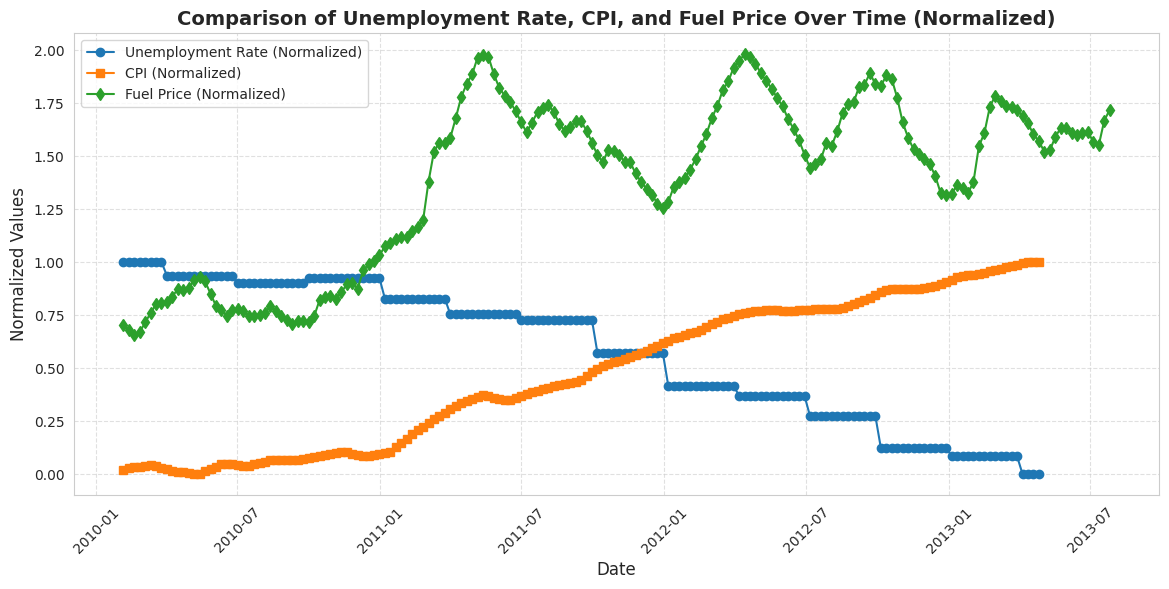

In [26]:
# Plotting the data
plt.figure(figsize=(14, 6))

# Plot each normalized metric
plt.plot(df_grouped['date'], df_grouped['unemployment_norm'], marker='o', linestyle='-', label='Unemployment Rate (Normalized)')
plt.plot(df_grouped['date'], df_grouped['cpi_norm'], marker='s', linestyle='-', label='CPI (Normalized)')
plt.plot(df_grouped['date'], df_grouped['fuel_price_norm'], marker='d', linestyle='-', label='Fuel Price (Normalized)')

# Adding titles and labels
plt.title('Comparison of Unemployment Rate, CPI, and Fuel Price Over Time (Normalized)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Values', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Enable grid for better visibility
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

# **Comparing Unemployment Rate, CPI, and Fuel Price Over Time with Multiple Y-Axes**

In [27]:
# Group by 'Date' and calculate the average for each metric
df_grouped = df_features.groupby('date').mean().reset_index()
df_grouped.fillna(df_grouped.median(), inplace=True)

In [28]:
df_grouped

date  store  temperature  fuel_price    markdown1    markdown2  \
0   2010-02-05   23.0    34.037333    2.717844  5526.103487   325.355135   
1   2010-02-12   23.0    34.151333    2.694022  5526.103487   325.355135   
2   2010-02-19   23.0    37.719778    2.672067  5526.103487   325.355135   
3   2010-02-26   23.0    39.243556    2.683933  5526.103487   325.355135   
4   2010-03-05   23.0    42.917333    2.731200  5526.103487   325.355135   
..         ...    ...          ...         ...          ...          ...   
177 2013-06-28   23.0    79.871111    3.629400  4905.673333   766.902703   
178 2013-07-05   23.0    79.655778    3.583533  8197.936444  2192.764054   
179 2013-07-12   23.0    80.798667    3.568111  3962.768444  1259.823947   
180 2013-07-19   23.0    79.268667    3.683444  2607.699333   924.923158   
181 2013-07-26   23.0    78.037333    3.734444   896.289091   795.463947   

      markdown3    markdown4    markdown5         cpi  unemployment  isholiday  
0     63.814492  1777.919855  3386.596444  167.730885      8.619556        0.0  
1     63.814492  1777.919855  3386.596444  167.825608      8.619556        1.0  
2     63.814492  1777.919855  3386.596444  167.871686      8.619556        0.0  
3     63.814492  1777.919855  3386.596444  167.909657      8.619556        0.0  
4     63.814492  1777.919855  3386.596444  167.947628      8.619556        0.0  
..          ...          ...          ...         ...           ...        ...  
177   23.950385  3831.422703  3771.952889  172.202844      8.097556        0.0  
178  626.819070  8357.932564  2389.641333  172.202844      8.097556        0.0  
179   71.435814  2322.072703  2891.560222  172.202844      8.097556        0.0  
180  142.733000  1034.775526  1893.073333  172.202844      8.097556        0.0  
181   41.174167   186.227838  1623.047111  172.202844      8.097556        0.0  

[182 rows x 12 columns]

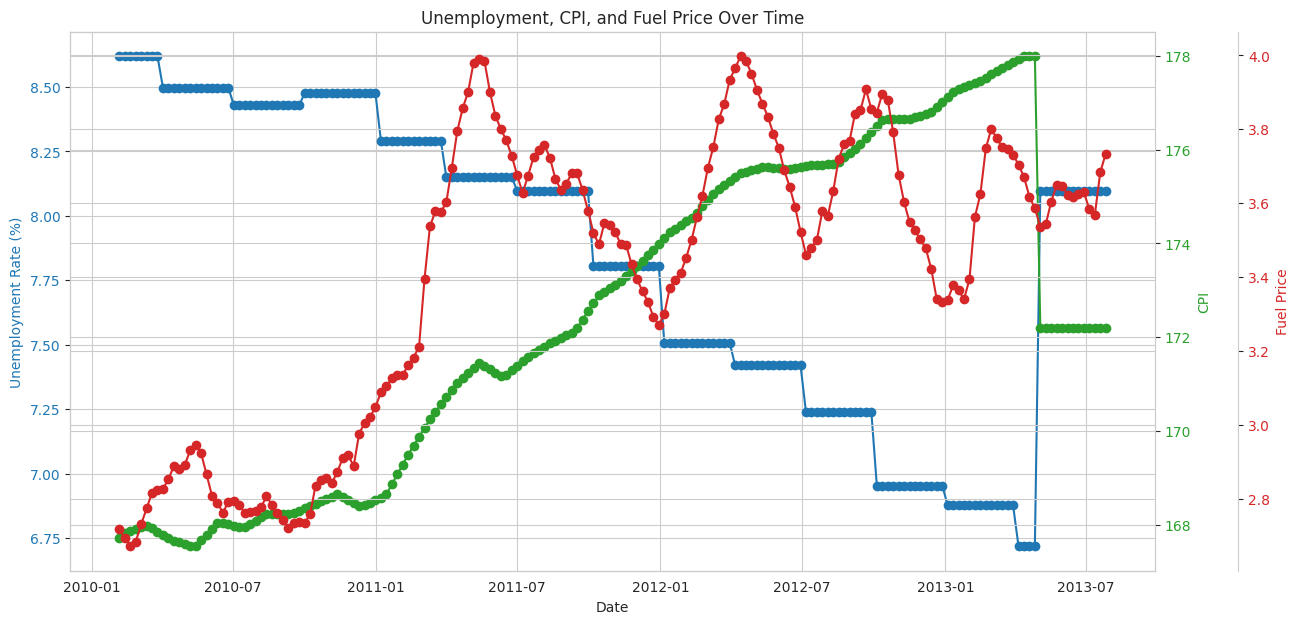

In [29]:
# Drop or fill NaN values
df_grouped = df_features.groupby('date').mean().reset_index()
df_grouped.fillna(df_grouped.median(), inplace=True)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Unemployment on primary y-axis
ax1.plot(df_grouped['date'], df_grouped['unemployment'], color='tab:blue', marker='o', linestyle='-', label='Unemployment Rate (%)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Unemployment Rate (%)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for CPI
ax2 = ax1.twinx()
ax2.plot(df_grouped['date'], df_grouped['cpi'], color='tab:green', marker='o', linestyle='-', label='CPI')
ax2.set_ylabel('CPI', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Create a third y-axis for Fuel Price
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(df_grouped['date'], df_grouped['fuel_price'], color='tab:red', marker='o', linestyle='-', label='Fuel Price')
ax3.set_ylabel('Fuel Price', color='tab:red')
ax3.tick_params(axis='y', labelcolor='tab:red')

# Title
plt.title('Unemployment, CPI, and Fuel Price Over Time')

# Force rendering of plot
fig.canvas.draw()
plt.show()

In [30]:
print(df_grouped.isna().sum())  # Check if any NaN values are left

date            0
store           0
temperature     0
fuel_price      0
markdown1       0
markdown2       0
markdown3       0
markdown4       0
markdown5       0
cpi             0
unemployment    0
isholiday       0
dtype: int64


# **Data Preprocessing**

In [31]:
# filling missing values
df_features['cpi'] = df_features['cpi'].fillna(df_features['cpi'].median())
df_features['unemployment'] = df_features['unemployment'].fillna(df_features['unemployment'].median())

In [32]:
# Replacing negative markdown values with 0 and filling NaNs with 0
for i in range(1, 6):
  column_name = f'markdown{i}'
  df_features[column_name] = df_features[column_name].apply(lambda x: 0 if x < 0 else x).fillna(0)

In [33]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         8190 non-null   int64         
 1   date          8190 non-null   datetime64[ns]
 2   temperature   8190 non-null   float64       
 3   fuel_price    8190 non-null   float64       
 4   markdown1     8190 non-null   float64       
 5   markdown2     8190 non-null   float64       
 6   markdown3     8190 non-null   float64       
 7   markdown4     8190 non-null   float64       
 8   markdown5     8190 non-null   float64       
 9   cpi           8190 non-null   float64       
 10  unemployment  8190 non-null   float64       
 11  isholiday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [34]:
df_features.head()

store       date  temperature  fuel_price  markdown1  markdown2  markdown3  \
0     17 2010-08-13        65.17       2.837        0.0        0.0        0.0   
1      4 2010-08-13        78.08       2.698        0.0        0.0        0.0   
2     44 2010-08-13        74.93       2.837        0.0        0.0        0.0   
3     13 2010-08-13        74.93       2.837        0.0        0.0        0.0   
4     10 2010-08-13        88.37       3.049        0.0        0.0        0.0   

   markdown4  markdown5      cpi  unemployment  isholiday  
0        0.0        0.0  126.064          6.70      False  
1        0.0        0.0  126.064          7.37      False  
2        0.0        0.0  126.064          7.80      False  
3        0.0        0.0  126.064          7.95      False  
4        0.0        0.0  126.064          9.20      False

In [35]:
df_train.shape, df_store.shape, df_features.shape

((421570, 5), (45, 3), (8190, 12))

In [36]:
df_store.head()

store type    size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [37]:
df_train.head()

store  dept        date  weekly_sales  isholiday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

# **Merging DataFrames**
We are merging the following 3 datasets to create a consolidated dataset:

1️. features.csv:

- Contains additional information about each store on a weekly basis (e.g., temperature, fuel price, markdowns, CPI, unemployment, etc.).

2️.train.csv:

- Historical weekly sales data from 2010-02-05 to 2012-11-01 with the
  following columns:
  - Store: Store number
  - Dept: Department number
  - Date: Week date
  - Weekly_Sales: Weekly sales for the given department in the given store
  - IsHoliday: Indicates if the week contains a special holiday

3️. stores.csv:

 - Contains static information about each store:
 - Store: Store number (1 to 45)
 - Type: Store type (A, B, or C)
 - Size: Size of the store (in square footage)


In [42]:
train_df = pd.merge(df_train,df_store,on ='store',how ='left')

In [43]:
train_df.head()

store  dept        date  weekly_sales  isholiday type    size
0      1     1  2010-02-05      24924.50      False    A  151315
1      1     1  2010-02-12      46039.49       True    A  151315
2      1     1  2010-02-19      41595.55      False    A  151315
3      1     1  2010-02-26      19403.54      False    A  151315
4      1     1  2010-03-05      21827.90      False    A  151315

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   store         421570 non-null  int64  
 1   dept          421570 non-null  int64  
 2   date          421570 non-null  object 
 3   weekly_sales  421570 non-null  float64
 4   isholiday     421570 non-null  bool   
 5   type          421570 non-null  object 
 6   size          421570 non-null  int64  
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 19.7+ MB


In [45]:
df_features.head()

store       date  temperature  fuel_price  markdown1  markdown2  markdown3  \
0     17 2010-08-13        65.17       2.837        0.0        0.0        0.0   
1      4 2010-08-13        78.08       2.698        0.0        0.0        0.0   
2     44 2010-08-13        74.93       2.837        0.0        0.0        0.0   
3     13 2010-08-13        74.93       2.837        0.0        0.0        0.0   
4     10 2010-08-13        88.37       3.049        0.0        0.0        0.0   

   markdown4  markdown5      cpi  unemployment  isholiday  
0        0.0        0.0  126.064          6.70      False  
1        0.0        0.0  126.064          7.37      False  
2        0.0        0.0  126.064          7.80      False  
3        0.0        0.0  126.064          7.95      False  
4        0.0        0.0  126.064          9.20      False

In [46]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         8190 non-null   int64         
 1   date          8190 non-null   datetime64[ns]
 2   temperature   8190 non-null   float64       
 3   fuel_price    8190 non-null   float64       
 4   markdown1     8190 non-null   float64       
 5   markdown2     8190 non-null   float64       
 6   markdown3     8190 non-null   float64       
 7   markdown4     8190 non-null   float64       
 8   markdown5     8190 non-null   float64       
 9   cpi           8190 non-null   float64       
 10  unemployment  8190 non-null   float64       
 11  isholiday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [48]:
print(df_features.columns)
print(df_train.columns)
print(df_store.columns)

Index(['store', 'date', 'temperature', 'fuel_price', 'markdown1', 'markdown2',
       'markdown3', 'markdown4', 'markdown5', 'cpi', 'unemployment',
       'isholiday'],
      dtype='object')
Index(['store', 'dept', 'date', 'weekly_sales', 'isholiday'], dtype='object')
Index(['store', 'type', 'size'], dtype='object')


# **Ensuring Consistency in merged dataframe**

In [49]:
# Convert store columns to string to ensure consistency
df_features['store'] = df_features['store'].astype(str)
df_train['store'] = df_train['store'].astype(str)
df_store['store'] = df_store['store'].astype(str)

# Convert date columns to datetime if they are not already
df_features['date'] = pd.to_datetime(df_features['date'])
df_train['date'] = pd.to_datetime(df_train['date'])

# Strip any leading/trailing spaces in the store columns
df_features['store'] = df_features['store'].str.strip()
df_train['store'] = df_train['store'].str.strip()
df_store['store'] = df_store['store'].str.strip()

In [55]:
# Merge df_features with df_train on 'store' and 'date'
merged_df = pd.merge(df_features, df_train, on=['store','date'], how ='inner')

# Merge the result with df_stores on 'store' only
final_merged_df = pd.merge(merged_df, df_store, on='store', how ='inner')

In [59]:
final_merged_df.head()

store       date  temperature  fuel_price  markdown1  markdown2  markdown3  \
0    17 2010-08-13        65.17       2.837        0.0        0.0        0.0   
1    17 2010-08-13        65.17       2.837        0.0        0.0        0.0   
2    17 2010-08-13        65.17       2.837        0.0        0.0        0.0   
3    17 2010-08-13        65.17       2.837        0.0        0.0        0.0   
4    17 2010-08-13        65.17       2.837        0.0        0.0        0.0   

   markdown4  markdown5      cpi  unemployment  isholiday_x  dept  \
0        0.0        0.0  126.064           6.7        False     1   
1        0.0        0.0  126.064           6.7        False     2   
2        0.0        0.0  126.064           6.7        False     3   
3        0.0        0.0  126.064           6.7        False     4   
4        0.0        0.0  126.064           6.7        False     5   

   weekly_sales  isholiday_y type   size  
0      12906.97        False    B  93188  
1      36476.06        False    B  93188  
2      29853.82        False    B  93188  
3      21577.97        False    B  93188  
4      15165.42        False    B  93188

In [60]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   store         421570 non-null  object        
 1   date          421570 non-null  datetime64[ns]
 2   temperature   421570 non-null  float64       
 3   fuel_price    421570 non-null  float64       
 4   markdown1     421570 non-null  float64       
 5   markdown2     421570 non-null  float64       
 6   markdown3     421570 non-null  float64       
 7   markdown4     421570 non-null  float64       
 8   markdown5     421570 non-null  float64       
 9   cpi           421570 non-null  float64       
 10  unemployment  421570 non-null  float64       
 11  isholiday_x   421570 non-null  bool          
 12  dept          421570 non-null  int64         
 13  weekly_sales  421570 non-null  float64       
 14  isholiday_y   421570 non-null  bool          
 15  type          421

In [61]:
final_merged_df['date'] = pd.to_datetime(final_merged_df['date'],errors='coerce')
final_merged_df.sort_values(by=['date'],inplace=True)
final_merged_df.set_index(final_merged_df.date, inplace=True)
final_merged_df.head()

store       date  temperature  fuel_price  markdown1  markdown2  \
date                                                                         
2010-02-05    40 2010-02-05        14.48       2.788        0.0        0.0   
2010-02-05    28 2010-02-05        49.47       2.962        0.0        0.0   
2010-02-05    28 2010-02-05        49.47       2.962        0.0        0.0   
2010-02-05    28 2010-02-05        49.47       2.962        0.0        0.0   
2010-02-05    28 2010-02-05        49.47       2.962        0.0        0.0   

            markdown3  markdown4  markdown5         cpi  unemployment  \
date                                                                    
2010-02-05        0.0        0.0        0.0  131.527903          5.89   
2010-02-05        0.0        0.0        0.0  126.442065         13.98   
2010-02-05        0.0        0.0        0.0  126.442065         13.98   
2010-02-05        0.0        0.0        0.0  126.442065         13.98   
2010-02-05        0.0        0.0        0.0  126.442065         13.98   

            isholiday_x  dept  weekly_sales  isholiday_y type    size  
date                                                                   
2010-02-05        False     1      18116.85        False    A  155083  
2010-02-05        False    55      17459.50        False    A  206302  
2010-02-05        False    56        438.50        False    A  206302  
2010-02-05        False    58       1975.00        False    A  206302  
2010-02-05        False    59        941.66        False    A  206302

In [62]:
#checking whether the column IsHoliday_x and IsHoliday_y are same or not
final_merged_df['isholiday_x'].isin(final_merged_df['isholiday_y']).all()

True

In [63]:
#Since these two columns are same so drop any one column and make another column as IsHoliday
final_merged_df.drop(columns='isholiday_x',inplace=True)
final_merged_df.rename(columns={"isholiday_y" : "IsHoliday"}, inplace=True)
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   store         421570 non-null  object        
 1   date          421570 non-null  datetime64[ns]
 2   temperature   421570 non-null  float64       
 3   fuel_price    421570 non-null  float64       
 4   markdown1     421570 non-null  float64       
 5   markdown2     421570 non-null  float64       
 6   markdown3     421570 non-null  float64       
 7   markdown4     421570 non-null  float64       
 8   markdown5     421570 non-null  float64       
 9   cpi           421570 non-null  float64       
 10  unemployment  421570 non-null  float64       
 11  dept          421570 non-null  int64         
 12  weekly_sales  421570 non-null  float64       
 13  IsHoliday     421570 non-null  bool          
 14  type          421570 non-null  object        
 15  s

In [64]:
final_merged_df.head()

store       date  temperature  fuel_price  markdown1  markdown2  \
date                                                                         
2010-02-05    40 2010-02-05        14.48       2.788        0.0        0.0   
2010-02-05    28 2010-02-05        49.47       2.962        0.0        0.0   
2010-02-05    28 2010-02-05        49.47       2.962        0.0        0.0   
2010-02-05    28 2010-02-05        49.47       2.962        0.0        0.0   
2010-02-05    28 2010-02-05        49.47       2.962        0.0        0.0   

            markdown3  markdown4  markdown5         cpi  unemployment  dept  \
date                                                                          
2010-02-05        0.0        0.0        0.0  131.527903          5.89     1   
2010-02-05        0.0        0.0        0.0  126.442065         13.98    55   
2010-02-05        0.0        0.0        0.0  126.442065         13.98    56   
2010-02-05        0.0        0.0        0.0  126.442065         13.98    58   
2010-02-05        0.0        0.0        0.0  126.442065         13.98    59   

            weekly_sales  IsHoliday type    size  
date                                              
2010-02-05      18116.85      False    A  155083  
2010-02-05      17459.50      False    A  206302  
2010-02-05        438.50      False    A  206302  
2010-02-05       1975.00      False    A  206302  
2010-02-05        941.66      False    A  206302

In [65]:
#Outlier Detection and Abnormalities
agg_data = final_merged_df.groupby(['store', 'dept']).weekly_sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.head()

store  dept       max       min          mean    median           std
0     1     1  57592.12  14537.37  22513.322937  18535.48   9854.349032
1     1     2  65615.36  35819.83  46102.090420  45561.85   3440.673222
2     1     3  51159.17   6165.73  13150.478042  10366.85   8708.978853
3     1     4  47893.23  32497.43  36964.154476  36579.96   2930.698313
4     1     5  85676.09  11570.27  24257.941119  21183.42  11330.286495

In [67]:
agg_data.isnull().sum()

store      0
dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

final_merged_df['IsHoliday'] = le.fit_transform(final_merged_df['IsHoliday'])
final_merged_df['type'] = le.fit_transform(final_merged_df['type'])

In [70]:
final_merged_df.head()

store       date  temperature  fuel_price  markdown1  markdown2  \
date                                                                         
2010-02-05    40 2010-02-05        14.48       2.788        0.0        0.0   
2010-02-05    28 2010-02-05        49.47       2.962        0.0        0.0   
2010-02-05    28 2010-02-05        49.47       2.962        0.0        0.0   
2010-02-05    28 2010-02-05        49.47       2.962        0.0        0.0   
2010-02-05    28 2010-02-05        49.47       2.962        0.0        0.0   

            markdown3  markdown4  markdown5         cpi  unemployment  dept  \
date                                                                          
2010-02-05        0.0        0.0        0.0  131.527903          5.89     1   
2010-02-05        0.0        0.0        0.0  126.442065         13.98    55   
2010-02-05        0.0        0.0        0.0  126.442065         13.98    56   
2010-02-05        0.0        0.0        0.0  126.442065         13.98    58   
2010-02-05        0.0        0.0        0.0  126.442065         13.98    59   

            weekly_sales  IsHoliday  type    size  
date                                               
2010-02-05      18116.85          0     0  155083  
2010-02-05      17459.50          0     0  206302  
2010-02-05        438.50          0     0  206302  
2010-02-05       1975.00          0     0  206302  
2010-02-05        941.66          0     0  206302

In [71]:
final_merged_df['dept'].nunique()

81

In [81]:
final_merged_df['dept'].unique().max()

99

In [82]:
final_merged_df['IsHoliday'].nunique()

2

In [85]:
final_merged_df['type'].nunique()

3

# **Plotting Stores by Weekly Sales**

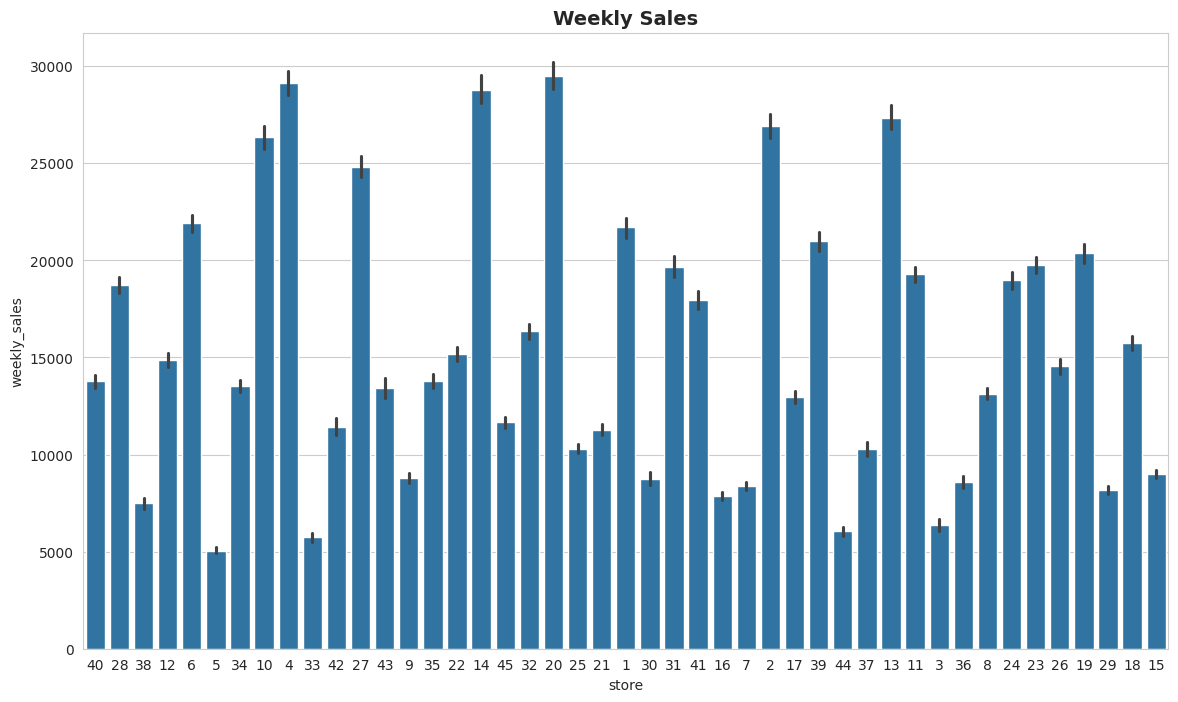

In [90]:
plt.figure(figsize=(14,8))
sns.barplot(x='store',y='weekly_sales',data=final_merged_df)
plt.title('Weekly Sales', fontsize=14, fontweight='bold')
plt.show()

In [91]:
# Ranking stores by total weekly sales across all dates

# Ensure 'store' column is integer type (optional if already int)
final_merged_df['store'] = final_merged_df['store'].astype(int)

# Aggregate total weekly sales for each store
total_sales = final_merged_df.groupby('store', as_index=False)['weekly_sales'].sum()

# Sort stores by total weekly sales in descending order
total_sales = total_sales.sort_values(by='weekly_sales', ascending=False)

# Display the result
print(total_sales)

    store  weekly_sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08
18     19  2.066349e+08
30     31  1.996139e+08
22     23  1.987506e+08
23     24  1.940160e+08
10     11  1.939628e+08
27     28  1.892637e+08
40     41  1.813419e+08
31     32  1.668192e+08
17     18  1.551147e+08
21     22  1.470756e+08
11     12  1.442872e+08
25     26  1.434164e+08
33     34  1.382498e+08
39     40  1.378703e+08
34     35  1.315207e+08
7       8  1.299512e+08
16     17  1.277821e+08
44     45  1.123953e+08
20     21  1.081179e+08
24     25  1.010612e+08
42     43  9.056544e+07
14     15  8.913368e+07
6       7  8.159828e+07
41     42  7.956575e+07
8       9  7.778922e+07
28     29  7.714155e+07
15     16  7.425243e+07
36     37  7.420274e+07
29     30  6.271689e+07
2       3  5.758674e+07
37     38  5.515

Note:

- Stores 20, 4, 14, 13, 2 are the top 5 stores by weekly sales
- Stores 38, 36, 5, 44, 33 are the bottom 5 stores by weekly sales

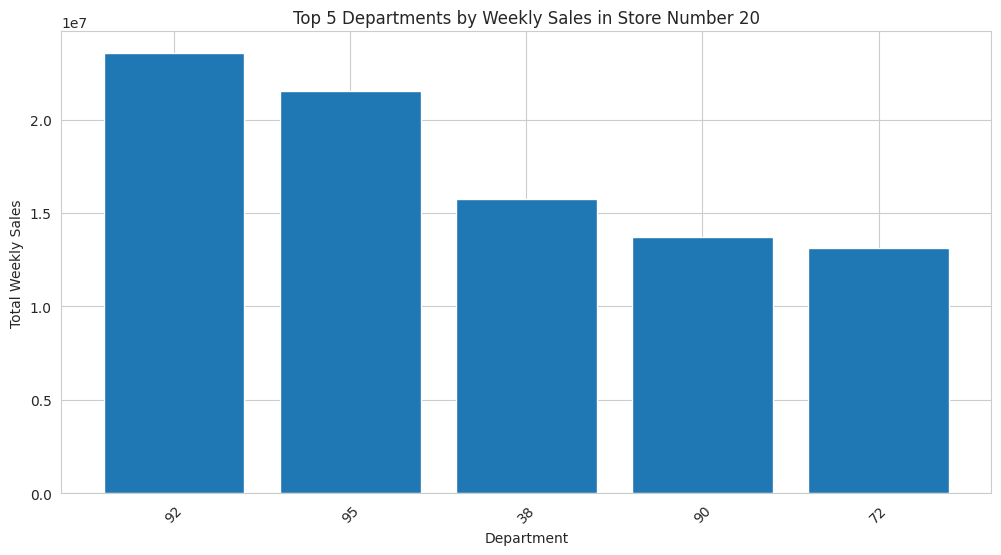

In [92]:
# <= Top 5 departments by weekly sales of Store 20 =>

# Filtering the DataFrame for store number 20
store_20_df = final_merged_df[final_merged_df['store'] == 20]

# Aggregating weekly sales by department
department_sales = store_20_df.groupby('dept')['weekly_sales'].sum().reset_index()

# Sorting departments by total sales and get the top 5 departments
top_departments = department_sales.sort_values(by='weekly_sales', ascending=False).head(5)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_departments['dept'].astype(str), top_departments['weekly_sales'])
plt.xlabel('Department')
plt.ylabel('Total Weekly Sales')
plt.title('Top 5 Departments by Weekly Sales in Store Number 20')
plt.xticks(rotation=45)
plt.show()

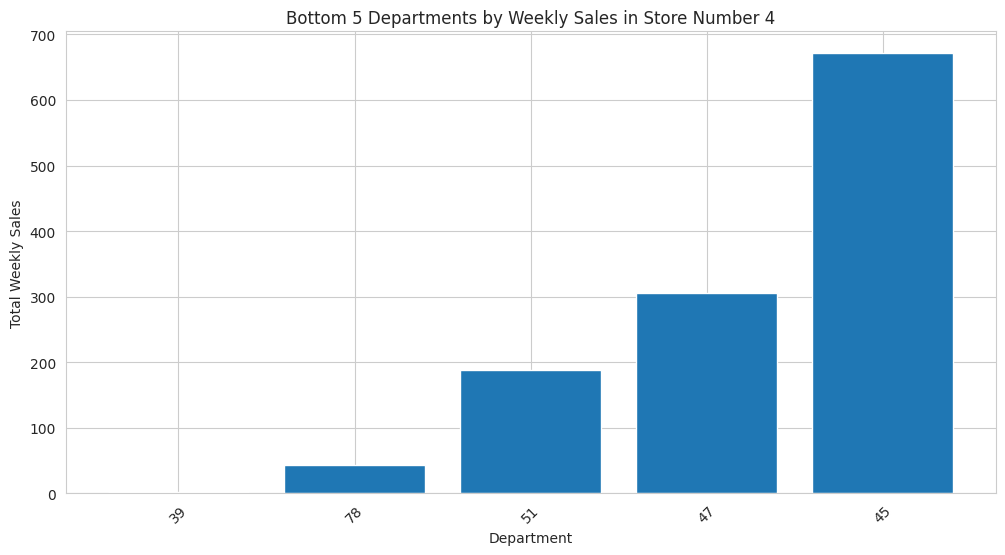

In [93]:
# <= Bottom 5 departments by weekly sales of Store 4 =>

# Filtering the DataFrame for store number 4
store_4_df = final_merged_df[final_merged_df['store'] == 4]

# Aggregating weekly sales by department
department_sales = store_4_df.groupby('dept')['weekly_sales'].sum().reset_index()

# Sorting departments by total sales and get the bottom 5
btm_departments = department_sales.sort_values(by='weekly_sales', ascending=True).head(5)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(btm_departments['dept'].astype(str), btm_departments['weekly_sales'])
plt.xlabel('Department')
plt.ylabel('Total Weekly Sales')
plt.title('Bottom 5 Departments by Weekly Sales in Store Number 4')
plt.xticks(rotation=45)
plt.show()

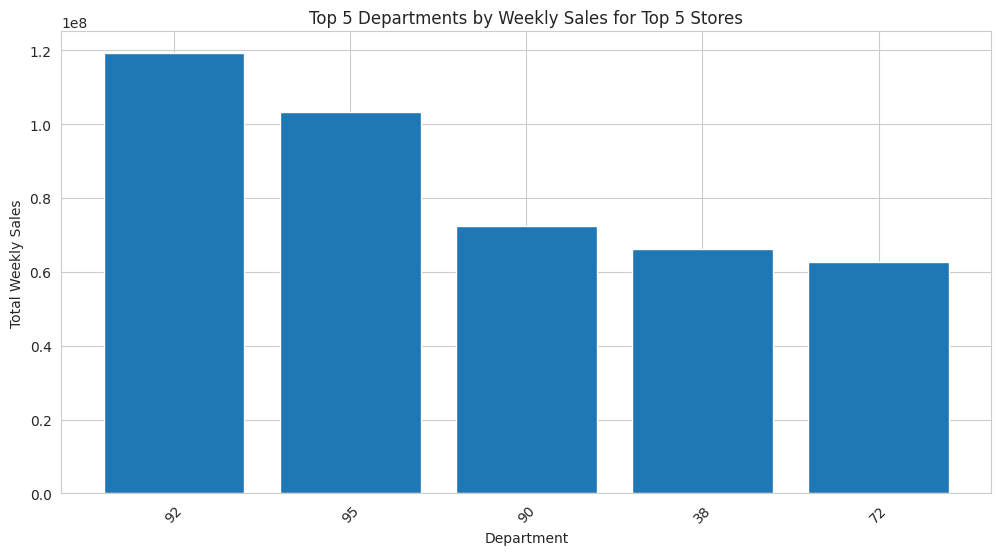

In [94]:
# <= Top 5 departments of Top 5 stores by weekly sales (Combined for entire duration) =>

# Define the top 5 stores
top_stores = [20, 4, 14, 13, 2]

# Filter the DataFrame for the top 5 stores
top_stores_df = final_merged_df[final_merged_df['store'].isin(top_stores)]

# Aggregating weekly sales by department
department_sales = top_stores_df.groupby('dept')['weekly_sales'].sum().reset_index()

# Sorting departments by total sales and get the top 5
top_departments = department_sales.sort_values(by='weekly_sales', ascending=False).head(5)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_departments['dept'].astype(str), top_departments['weekly_sales'])
plt.xlabel('Department')
plt.ylabel('Total Weekly Sales')
plt.title('Top 5 Departments by Weekly Sales for Top 5 Stores')
plt.xticks(rotation=45)
plt.show()

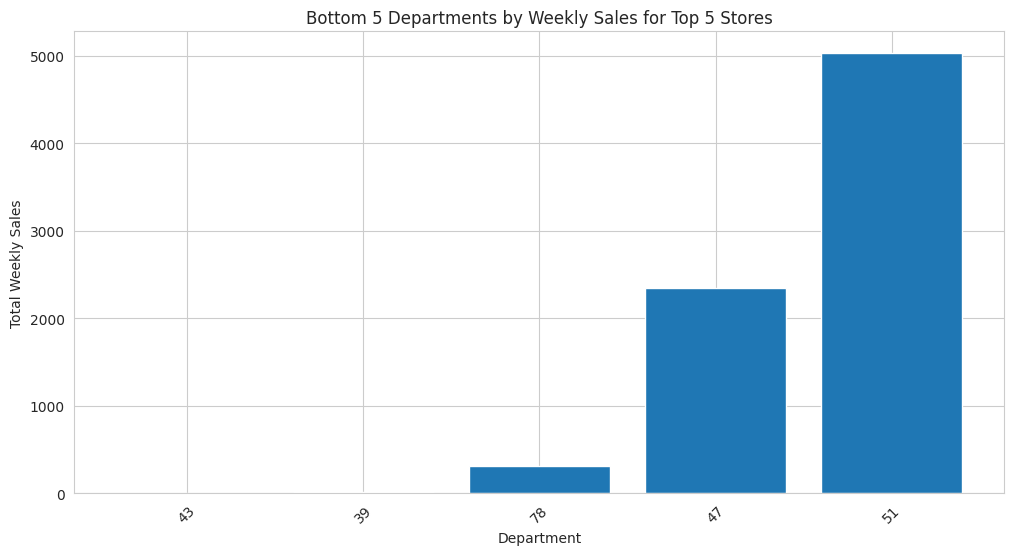

In [95]:
# <= Bottom 5 departments of Top 5 stores by weekly sales (Combined for entire duration) =>

# Define the top 5 stores
top_stores = [20, 4, 14, 13, 2]

# Filter the DataFrame for the top 5 stores
top_stores_df = final_merged_df[final_merged_df['store'].isin(top_stores)]

# Aggregating weekly sales by department
department_sales = top_stores_df.groupby('dept')['weekly_sales'].sum().reset_index()

# Sorting departments by total sales and get the bottom 5 department
btm_departments = department_sales.sort_values(by='weekly_sales', ascending=True).head(5)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(btm_departments['dept'].astype(str), btm_departments['weekly_sales'])
plt.xlabel('Department')
plt.ylabel('Total Weekly Sales')
plt.title('Bottom 5 Departments by Weekly Sales for Top 5 Stores')
plt.xticks(rotation=45)
plt.show()

In [107]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   store         421570 non-null  int64         
 1   date          421570 non-null  datetime64[ns]
 2   temperature   421570 non-null  float64       
 3   fuel_price    421570 non-null  float64       
 4   markdown1     421570 non-null  float64       
 5   markdown2     421570 non-null  float64       
 6   markdown3     421570 non-null  float64       
 7   markdown4     421570 non-null  float64       
 8   markdown5     421570 non-null  float64       
 9   cpi           421570 non-null  float64       
 10  unemployment  421570 non-null  float64       
 11  dept          421570 non-null  int64         
 12  weekly_sales  421570 non-null  float64       
 13  IsHoliday     421570 non-null  int64         
 14  type          421570 non-null  int64         
 15  s

In [108]:
data = pd.read_csv('merged-data.csv')
data.head()

store        date  temperature  fuel_price  markdown1  markdown2  \
0     20  2010-02-05        25.92       2.784        0.0        0.0   
1     30  2010-02-05        39.05       2.572        0.0        0.0   
2     30  2010-02-05        39.05       2.572        0.0        0.0   
3     30  2010-02-05        39.05       2.572        0.0        0.0   
4     30  2010-02-05        39.05       2.572        0.0        0.0   

   markdown3  markdown4  markdown5         cpi  unemployment  dept  \
0        0.0        0.0        0.0  204.247194          8.19     1   
1        0.0        0.0        0.0  210.752605          8.32    17   
2        0.0        0.0        0.0  210.752605          8.32    16   
3        0.0        0.0        0.0  210.752605          8.32    14   
4        0.0        0.0        0.0  210.752605          8.32    13   

   weekly_sales  IsHoliday  type    size  
0      46021.21          0     0  203742  
1        198.01          0     2   42988  
2        974.31          0     2   42988  
3       1134.75          0     2   42988  
4      12059.20          0     2   42988

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   store         421570 non-null  int64  
 1   date          421570 non-null  object 
 2   temperature   421570 non-null  float64
 3   fuel_price    421570 non-null  float64
 4   markdown1     421570 non-null  float64
 5   markdown2     421570 non-null  float64
 6   markdown3     421570 non-null  float64
 7   markdown4     421570 non-null  float64
 8   markdown5     421570 non-null  float64
 9   cpi           421570 non-null  float64
 10  unemployment  421570 non-null  float64
 11  dept          421570 non-null  int64  
 12  weekly_sales  421570 non-null  float64
 13  IsHoliday     421570 non-null  int64  
 14  type          421570 non-null  int64  
 15  size          421570 non-null  int64  
dtypes: float64(10), int64(5), object(1)
memory usage: 51.5+ MB


In [110]:
# Convert the date column to datetime format if it's not already
data['date'] = pd.to_datetime(data['date'])

# Group by date and sum weekly sales
sales_over_time = data.groupby('date')['weekly_sales'].sum()

In [111]:
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
pd.options.plotting.backend= "plotly"

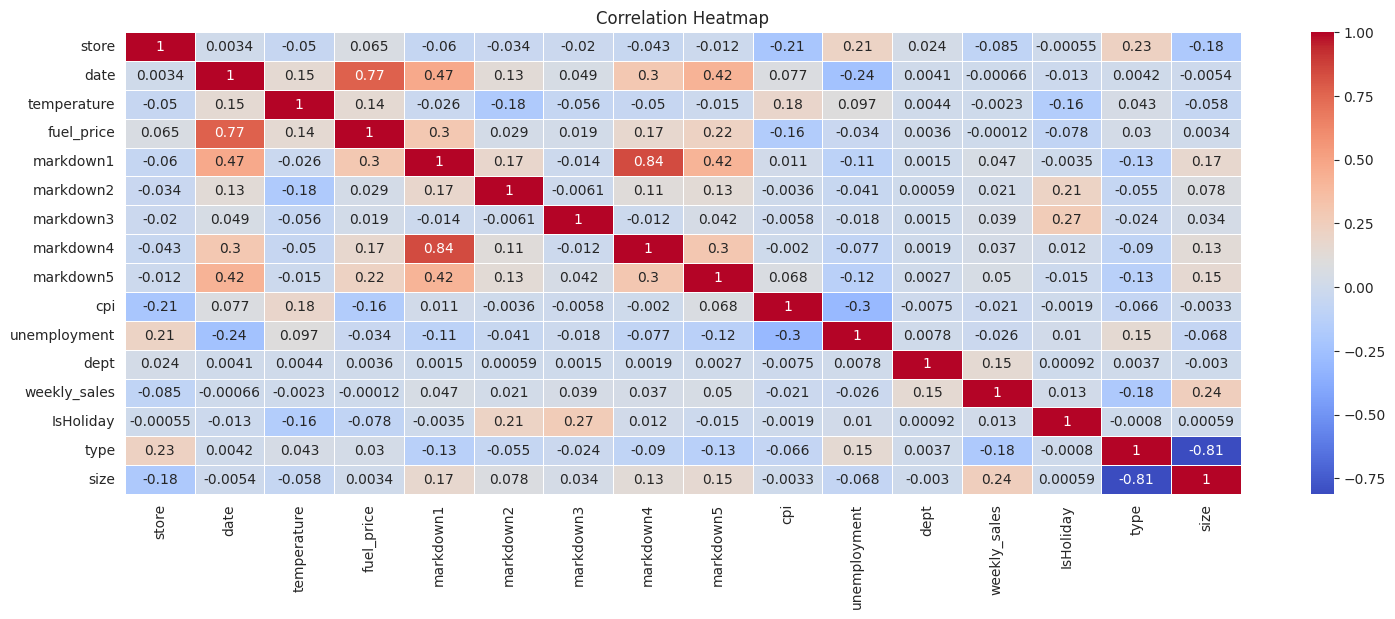

In [112]:
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

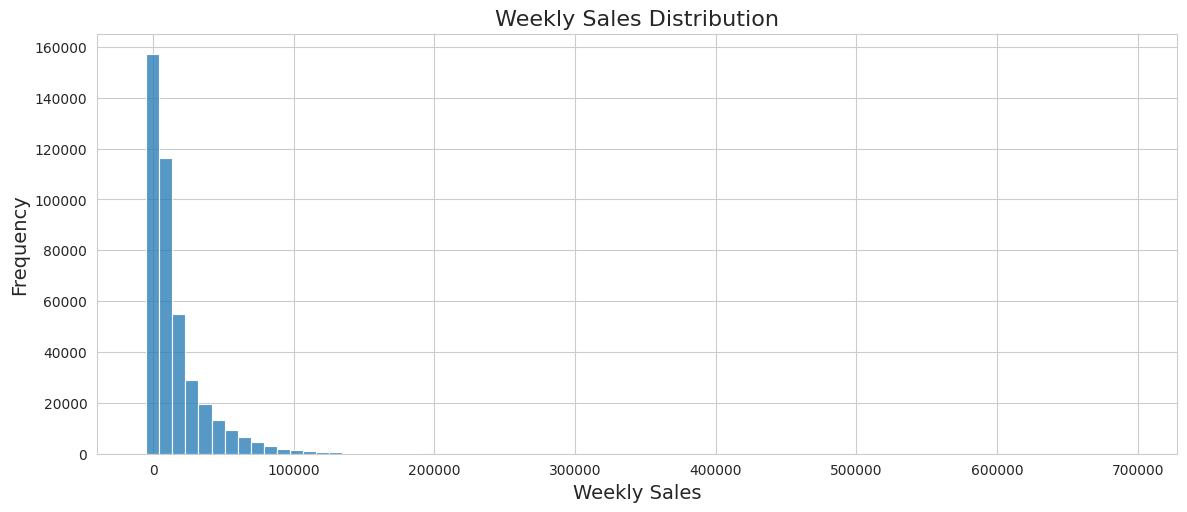

In [113]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the histogram with 75 bins
sns.histplot(data['weekly_sales'], bins=75, kde=False)

# Set the title and labels
plt.title('Weekly Sales Distribution', fontsize=16)
plt.xlabel('Weekly Sales', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set margins
plt.gcf().subplots_adjust(left=0.05, right=0.95, bottom=0.15, top=0.85)

# Show the plot
plt.show()

In [114]:
# Average of weekly sales by department (sorted)
avg_sales_dept = data.groupby("dept")["weekly_sales"].mean().sort_values()

fig = go.Figure()

fig.add_trace(go.Bar(
    y=avg_sales_dept.values,                  # y-axis: Average sales values
    x=avg_sales_dept.index,                   # x-axis: Department numbers
    text=avg_sales_dept.index,                # Text labels: department numbers
    textposition='outside'                    # Positioning text outside the bars
))

fig.update_traces(
    marker_color='darkcyan',
    marker_line_color='darkcyan',
    marker_line_width=1.5,
)

fig.update_layout(
    title_text='Average Weekly Sales by Department',
    xaxis_title_text="Department Number",   # x-axis label
    xaxis_showticklabels=True,              # Changed to True since x-axis is now set
    yaxis_title_text="Average Sales"        # y-axis label
)

fig.show()

In [115]:
# average of weekly sales by store (sorted)
avg_sales_store = data.groupby("store")["weekly_sales"].mean().sort_values()
fig = go.Figure()

fig.add_trace(go.Bar(y=avg_sales_store.values,
                    text=avg_sales_store.index,
                     textposition='outside'))


fig.update_traces(marker_color='rosybrown',
                  marker_line_color='darkmagenta',
                  marker_line_width=1.5,)

fig.update_layout(title_text='Average Weekly Sales by Store',
                  xaxis=dict(
                      title_text="Store Number",
                      showticklabels=False,
                      ticks='outside',
                      tickfont=dict(
                          family='Arial',
                          size=12,
                          color='rgb(82, 82, 82)')),
                       yaxis=dict(
                             title_text="Average Sales"))

fig.show()

In [116]:
# checking out the sum of sales by store type
fig = go.Figure()

fig.add_trace(go.Histogram(x=data["type"],
                          histnorm="percent",
                           xbins=dict(size=0.5),marker_color='#EB89B5',opacity=0.75))

fig.update_layout(
    height=500, width=400,
    title_text="Store Types in %",
    xaxis_title_text="Type",
    yaxis_title_text="Ratio",
)

fig.show()

**Note: Some department numbers are missing**

- Top 5 Departments:
  - 92: Dry Grocery
  - 95: Grocery, Snacks, and Beverages
  - 90: Dairy
  - 38: Prescription Pharmacy
  - 72: Electronics
- Bottom 5 Departments:
  - 43: Toys (Unsual)
  - 39: Misc/Jewellery
  - 78: Ladieswear (Part of Fashion)
  - 47: Something in Fashion
  - 51: Sporting Goods

# **Modelling Building**

In [121]:
data.head()

store       date  temperature  fuel_price  markdown1  markdown2  markdown3  \
0     20 2010-02-05        25.92       2.784        0.0        0.0        0.0   
1     30 2010-02-05        39.05       2.572        0.0        0.0        0.0   
2     30 2010-02-05        39.05       2.572        0.0        0.0        0.0   
3     30 2010-02-05        39.05       2.572        0.0        0.0        0.0   
4     30 2010-02-05        39.05       2.572        0.0        0.0        0.0   

   markdown4  markdown5         cpi  unemployment  dept  weekly_sales  \
0        0.0        0.0  204.247194          8.19     1      46021.21   
1        0.0        0.0  210.752605          8.32    17        198.01   
2        0.0        0.0  210.752605          8.32    16        974.31   
3        0.0        0.0  210.752605          8.32    14       1134.75   
4        0.0        0.0  210.752605          8.32    13      12059.20   

   IsHoliday  type    size  year  month  week  
0          0     0  203742  2010      2     5  
1          0     2   42988  2010      2     5  
2          0     2   42988  2010      2     5  
3          0     2   42988  2010      2     5  
4          0     2   42988  2010      2     5

In [122]:
# Converting the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extracting year, month, and week from the date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['week'] = data['date'].dt.isocalendar().week

# Checking for missing values
missing_values = data.isnull().sum()

In [123]:
# Displaying the updated dataset with new features and missing values
data.head(), missing_values

(   store       date  temperature  fuel_price  markdown1  markdown2  markdown3  \
 0     20 2010-02-05        25.92       2.784        0.0        0.0        0.0   
 1     30 2010-02-05        39.05       2.572        0.0        0.0        0.0   
 2     30 2010-02-05        39.05       2.572        0.0        0.0        0.0   
 3     30 2010-02-05        39.05       2.572        0.0        0.0        0.0   
 4     30 2010-02-05        39.05       2.572        0.0        0.0        0.0   
 
    markdown4  markdown5         cpi  unemployment  dept  weekly_sales  \
 0        0.0        0.0  204.247194          8.19     1      46021.21   
 1        0.0        0.0  210.752605          8.32    17        198.01   
 2        0.0        0.0  210.752605          8.32    16        974.31   
 3        0.0        0.0  210.752605          8.32    14       1134.75   
 4        0.0        0.0  210.752605          8.32    13      12059.20   
 
    IsHoliday  type    size  year  month  week  
 0         

# **Linear Models**

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the features for the model (excluding the target variable 'weekly_sales' and 'date')
features = data.drop(columns=['weekly_sales', 'date'])

# Target variable
target = data['weekly_sales']

In [125]:
features.head()

store  temperature  fuel_price  markdown1  markdown2  markdown3  markdown4  \
0     20        25.92       2.784        0.0        0.0        0.0        0.0   
1     30        39.05       2.572        0.0        0.0        0.0        0.0   
2     30        39.05       2.572        0.0        0.0        0.0        0.0   
3     30        39.05       2.572        0.0        0.0        0.0        0.0   
4     30        39.05       2.572        0.0        0.0        0.0        0.0   

   markdown5         cpi  unemployment  dept  IsHoliday  type    size  year  \
0        0.0  204.247194          8.19     1          0     0  203742  2010   
1        0.0  210.752605          8.32    17          0     2   42988  2010   
2        0.0  210.752605          8.32    16          0     2   42988  2010   
3        0.0  210.752605          8.32    14          0     2   42988  2010   
4        0.0  210.752605          8.32    13          0     2   42988  2010   

   month  week  
0      2     5  
1      2     5  
2      2     5  
3      2     5  
4      2     5

In [126]:
target.head()

0    46021.21
1      198.01
2      974.31
3     1134.75
4    12059.20
Name: weekly_sales, dtype: float64

In [127]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [129]:
# Making predictions on test set
y_pred = model.predict(X_test)

In [130]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

470345208.57561773
0.08780915801817535


Note: As anticipated, Linear Regression does not yield good results because the data does not exhibit a linear relationship.

# **Lasso & Ridge Regression**

In [132]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Feature Engineering: Adding interaction terms using PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Apply scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Regularization: Ridge Regression (L2)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_pred = ridge_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

In [135]:
print(ridge_r2*100)

11.581299737717131


In [137]:
# Regularization: Lasso Regression (L1)
lasso_model = Lasso(alpha=0.1)   # Step 1: Create Lasso model with alpha = 0.1 (regularization strength)
lasso_model.fit(X_train_scaled, y_train)  # Step 2: Train the model on scaled training data
lasso_pred = lasso_model.predict(X_test_scaled)  # Step 3: Make predictions on test data

# Step 4: Evaluation
lasso_mse = mean_squared_error(y_test, lasso_pred)  # Calculate Mean Squared Error
lasso_r2 = r2_score(y_test, lasso_pred)  # Calculate R-squared score

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.245e+13, tolerance: 1.740e+10



In [139]:
print(lasso_r2 * 100)

11.536166550640758


Note: Ridge and Lasso models also do not produce improved results.

# **Tree Models**

**Model: Random Forest Regression (n_est = 50)**

In [140]:
import time

In [143]:
# Start time
start_time = time.time()
rf_model_1 = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model_1.fit(X_train, y_train)
rf_pred_1 = rf_model_1.predict(X_test)
rf_mse_1 = mean_squared_error(y_test, rf_pred_1)
rf_r2_1 = r2_score(y_test, rf_pred_1)
# End time
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)
print("R^2 VALUE: ", rf_r2_1)

Execution Time:  4.21808553536733
R^2 VALUE:  0.9746693932597383


**Model: Random Forest Regression (n_est = 50, max_depth = 100)**

In [144]:
# Model: Random Forest Regressor (n_estimators=50, max_depth=100)
# Start time
start_time = time.time()
rf_model_1_100 = RandomForestRegressor(n_estimators=50, max_depth=100, random_state=42)
rf_model_1_100.fit(X_train, y_train)
rf_pred_1_100  = rf_model_1_100.predict(X_test)
rf_mse_1_100 = mean_squared_error(y_test, rf_pred_1_100)
rf_r2_1_100 = r2_score(y_test, rf_pred_1_100)
# End time
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)
print("R^2 VALUE: ", rf_r2_1_100)

Execution Time:  4.129897431532542
R^2 VALUE:  0.9746693932597383


# **Model: Random Forest Regression (n_est = 100)**

In [145]:
# Model: Random Forest Regressor (n_estimators=100)
# Start time
start_time = time.time()
rf_model_2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_2.fit(X_train, y_train)
rf_pred_2 = rf_model_2.predict(X_test)
rf_mse_2 = mean_squared_error(y_test, rf_pred_2)
rf_r2_2 = r2_score(y_test, rf_pred_2)
# End time
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)
print("R^2 VALUE: ", rf_r2_2)

Execution Time:  8.635956998666128
R^2 VALUE:  0.9752805326962908


**Model: Random Forest Regression (n_est = 100, max_depth = 100)**

In [146]:
# Model: Random Forest Regressor (n_estimators=100)
# Start time
start_time = time.time()
rf_model_2_100 = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)
rf_model_2_100.fit(X_train, y_train)
rf_pred_2_100 = rf_model_2_100.predict(X_test)
rf_mse_2_100 = mean_squared_error(y_test, rf_pred_2_100)
rf_r2_2_100 = r2_score(y_test, rf_pred_2_100)
# End time
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)
print("R^2 VALUE: ", rf_r2_2_100)

Execution Time:  8.277226789792378
R^2 VALUE:  0.9752805326962908


# **Gradient Boosting (n_est = 50)**

In [147]:
# Model: Gradient Boosting Regressor
start_time = time.time()
gb_model_1 = GradientBoostingRegressor(n_estimators=50, random_state=42)
gb_model_1.fit(X_train, y_train)
gb_pred_1 = gb_model_1.predict(X_test)
gb_mse_1 = mean_squared_error(y_test, gb_pred_1)
gb_r2_1 = r2_score(y_test, gb_pred_1)
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)
print("R^2 VALUE: ", gb_r2_1)

Execution Time:  0.7727650205294291
R^2 VALUE:  0.6520888500728567


**Gradient Boosting (n_est = 100)**

In [148]:
# Model: Gradient Boosting Regressor
start_time = time.time()
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred_2 = gb_model.predict(X_test)
gb_mse_2 = mean_squared_error(y_test, gb_pred_2)
gb_r2_2 = r2_score(y_test, gb_pred_2)
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)
print("R^2 VALUE: ", gb_r2_2)

Execution Time:  1.4855902830759684
R^2 VALUE:  0.7437162086119167


**Gradient Boosting (n_est = 200)**

In [149]:
# Model: Gradient Boosting Regressor
start_time = time.time()
gb_model = GradientBoostingRegressor(n_estimators=200, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred_3 = gb_model.predict(X_test)
gb_mse_3 = mean_squared_error(y_test, gb_pred_3)
gb_r2_3 = r2_score(y_test, gb_pred_3)
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)
print("R^2 VALUE: ", gb_r2_3)

Execution Time:  2.8935162742932636
R^2 VALUE:  0.8027364728597444


**XGB Regressor**

In [150]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(n_estimators = 50)
xgbr.fit(X_train, y_train)
xgb_pred = xgbr.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)
print("R^2 VALUE: ", xgb_r2)

R^2 VALUE:  0.922024866550321


In [151]:
xgboost_accuracy = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgboost_accuracy)

XGBoost Regressor Accuracy -  92.2024866550321


In [152]:
from xgboost import XGBRegressor
xgbr1 = XGBRegressor(n_estimators = 100)
xgbr1.fit(X_train, y_train)
xgb_pred_1 = xgbr.predict(X_test)
xgb_mse_1 = mean_squared_error(y_test, xgb_pred_1)
xgb_r2_1 = r2_score(y_test, xgb_pred_1)
print("R^2 VALUE: ", xgb_r2_1)

R^2 VALUE:  0.922024866550321


In [153]:
xgboost_accuracy = xgbr1.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgboost_accuracy)

XGBoost Regressor Accuracy -  94.32889703470117


In [154]:
xgbr2 = XGBRegressor(n_estimators=200)
xgbr2.fit(X_train, y_train)
xgb_pred_2 = xgbr2.predict(X_test)
xgb_mse_2 = mean_squared_error(y_test, xgb_pred_2)
xgb_r2_2 = r2_score(y_test, xgb_pred_2)
print("R^2 VALUE: ", xgb_r2_2)

R^2 VALUE:  0.9588031656895174


In [155]:
xgboost_accuracy = xgbr2.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgboost_accuracy)

XGBoost Regressor Accuracy -  95.88031656895174


# **Compiled Results**

In [156]:
# Compile the results with MSE and R^2
results = {
    "Model": ["Ridge Regression", "Lasso Regression", "Random Forest", "Random Forest" ,"Random Forest", "Random Forest", "Gradient Boosting", "Gradient Boosting", "Gradient Boosting", "XGB Regressor", "XGB Regressor", "XGB Regressor"],
    "MSE": [ridge_mse, lasso_mse, rf_mse_1, rf_mse_1_100, rf_mse_2, rf_mse_2_100, gb_mse_1, gb_mse_2, gb_mse_3, xgb_mse, xgb_mse_1, xgb_mse_2],
    "R² Score": [ridge_r2, lasso_r2, rf_r2_1, rf_r2_1_100, rf_r2_2, rf_r2_2_100, gb_r2_1, gb_r2_2, gb_r2_3, xgb_r2, xgb_r2_1, xgb_r2_2]
}

results_df = pd.DataFrame(results)
results_df

Model           MSE  R² Score
0    Ridge Regression  4.559058e+08  0.115813
1    Lasso Regression  4.561385e+08  0.115362
2       Random Forest  1.306101e+07  0.974669
3       Random Forest  1.306101e+07  0.974669
4       Random Forest  1.274589e+07  0.975281
5       Random Forest  1.274589e+07  0.975281
6   Gradient Boosting  1.793905e+08  0.652089
7   Gradient Boosting  1.321454e+08  0.743716
8   Gradient Boosting  1.017133e+08  0.802736
9       XGB Regressor  4.020566e+07  0.922025
10      XGB Regressor  4.020566e+07  0.922025
11      XGB Regressor  2.124197e+07  0.958803

# **Model Train v/s Test**

**Ridge Regression**

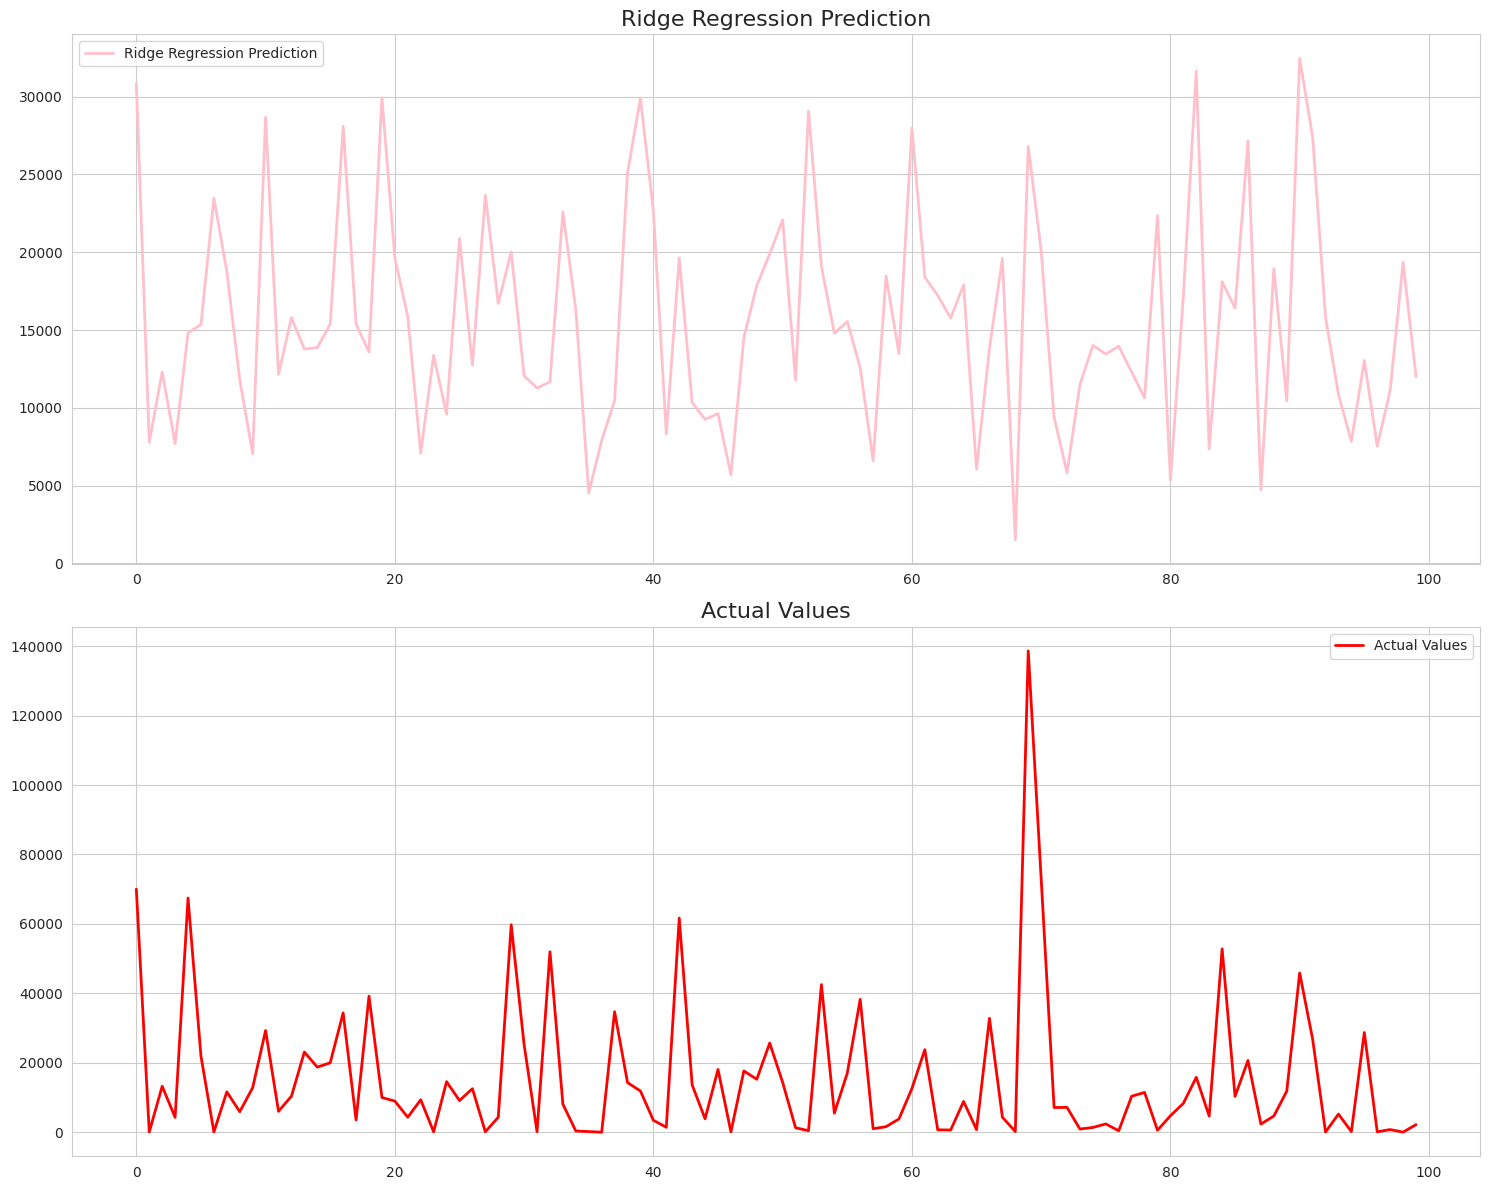

In [157]:
# Select a subset of the test data for visualization
n = 100  # Number of points to plot
y_test_subset = y_test[:n].values

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(15,12))

# First subplot: Ridge Regression predictions
ax[0].plot(ridge_pred[:n], label="Ridge Regression Prediction", linewidth=2.0, color='pink')
ax[0].set_title('Ridge Regression Prediction', fontsize=16)
ax[0].legend(loc="best")

# Second subplot: Actual values
ax[1].plot(y_test_subset, label="Actual Values", linewidth=2.0, color='red')
ax[1].set_title('Actual Values', fontsize=16)
ax[1].legend(loc="best")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

**Lasso Regression**

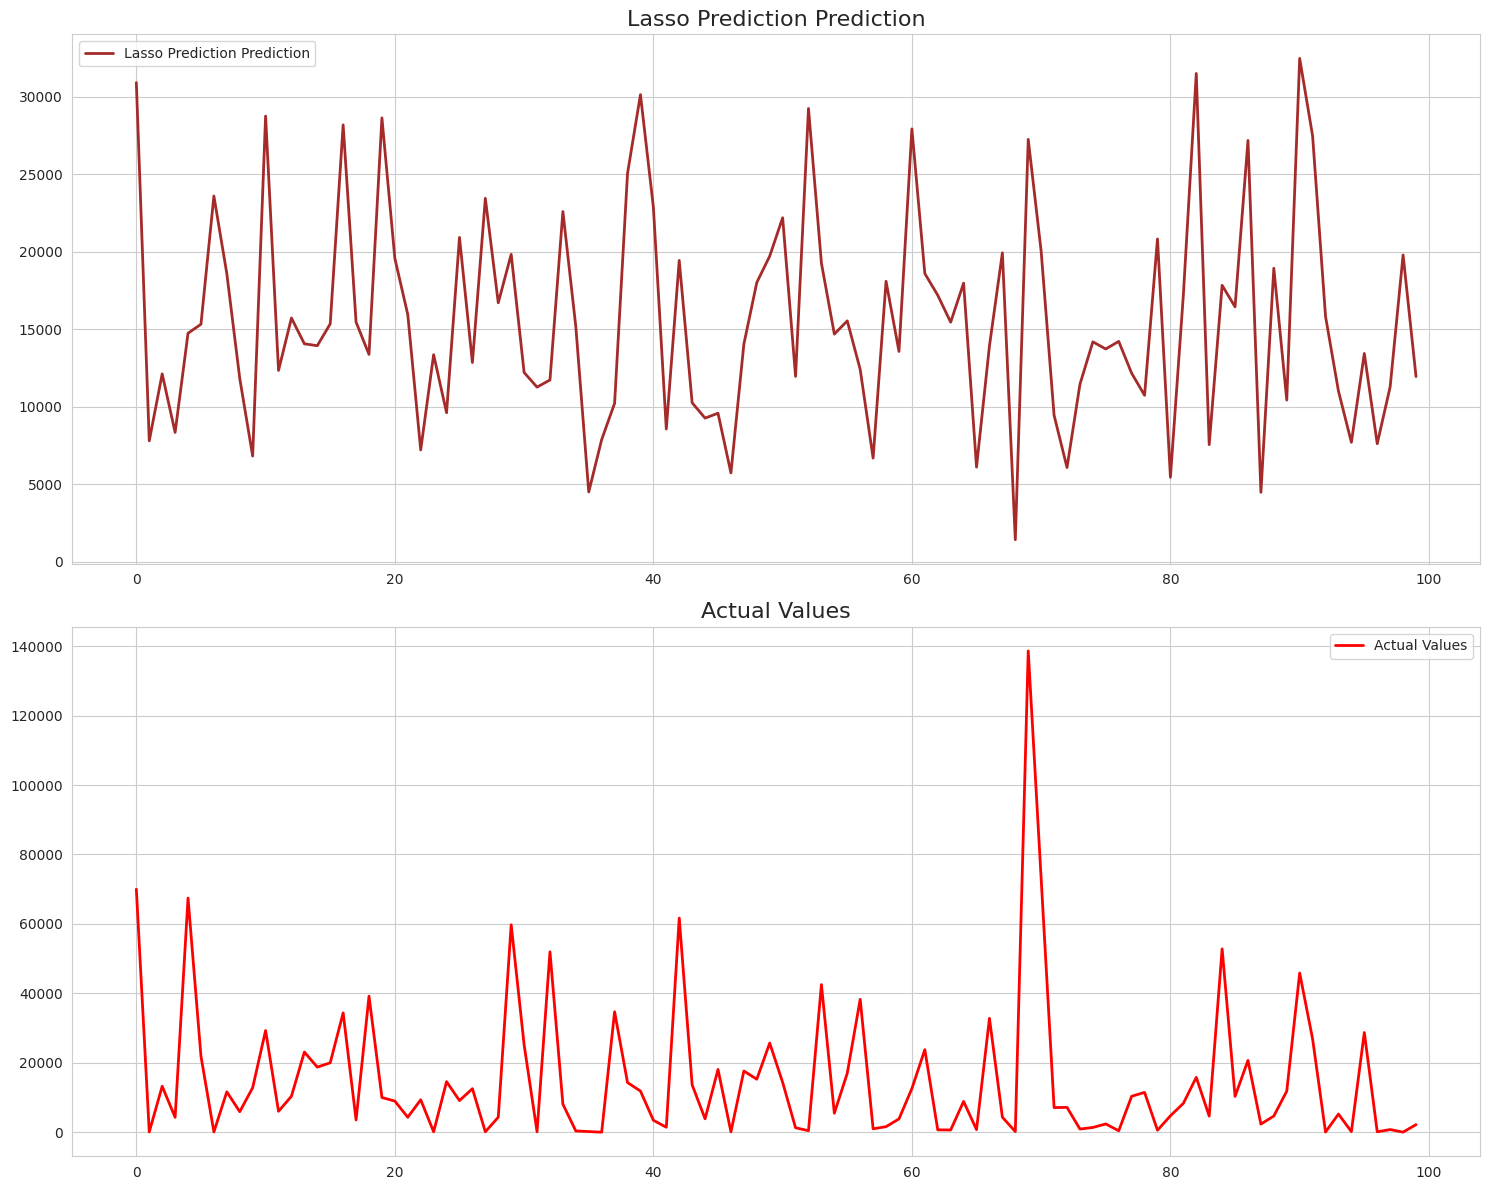

In [158]:
# Select a subset of the test data for visualization
n = 100  # Number of points to plot
y_test_subset = y_test[:n].values

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(15,12))

# First subplot: Lasso Prediction predictions
ax[0].plot(lasso_pred[:n], label="Lasso Prediction Prediction", linewidth=2.0, color='brown')
ax[0].set_title('Lasso Prediction Prediction', fontsize=16)
ax[0].legend(loc="best")

# Second subplot: Actual values
ax[1].plot(y_test_subset, label="Actual Values", linewidth=2.0, color='red')
ax[1].set_title('Actual Values', fontsize=16)
ax[1].legend(loc="best")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

**Random Forest Regressor**

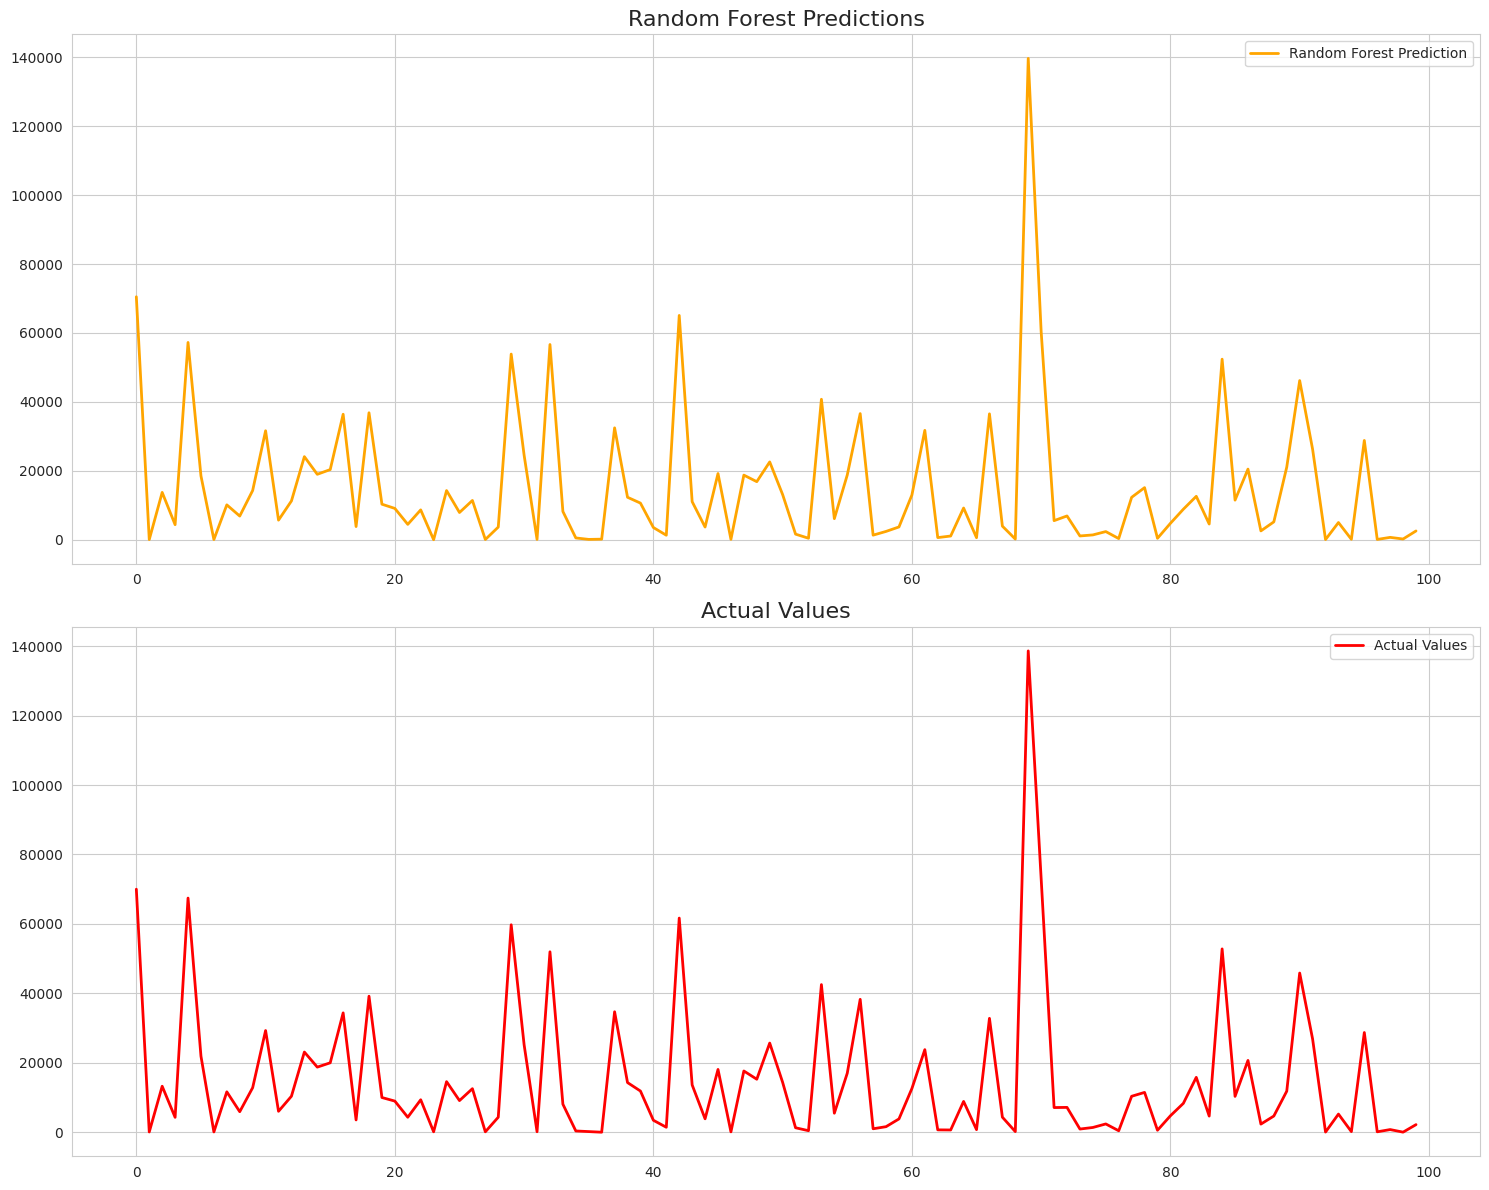

In [159]:
# Select a subset of the test data for visualization
n = 100  # Number of points to plot
y_test_subset = y_test[:n].values

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(15,12))

# First subplot: Random Forest predictions
ax[0].plot(rf_pred_2_100[:n], label="Random Forest Prediction", linewidth=2.0, color='orange')
ax[0].set_title('Random Forest Predictions', fontsize=16)
ax[0].legend(loc="best")

# Second subplot: Actual values
ax[1].plot(y_test_subset, label="Actual Values", linewidth=2.0, color='red')
ax[1].set_title('Actual Values', fontsize=16)
ax[1].legend(loc="best")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

**Gradient Boosting**

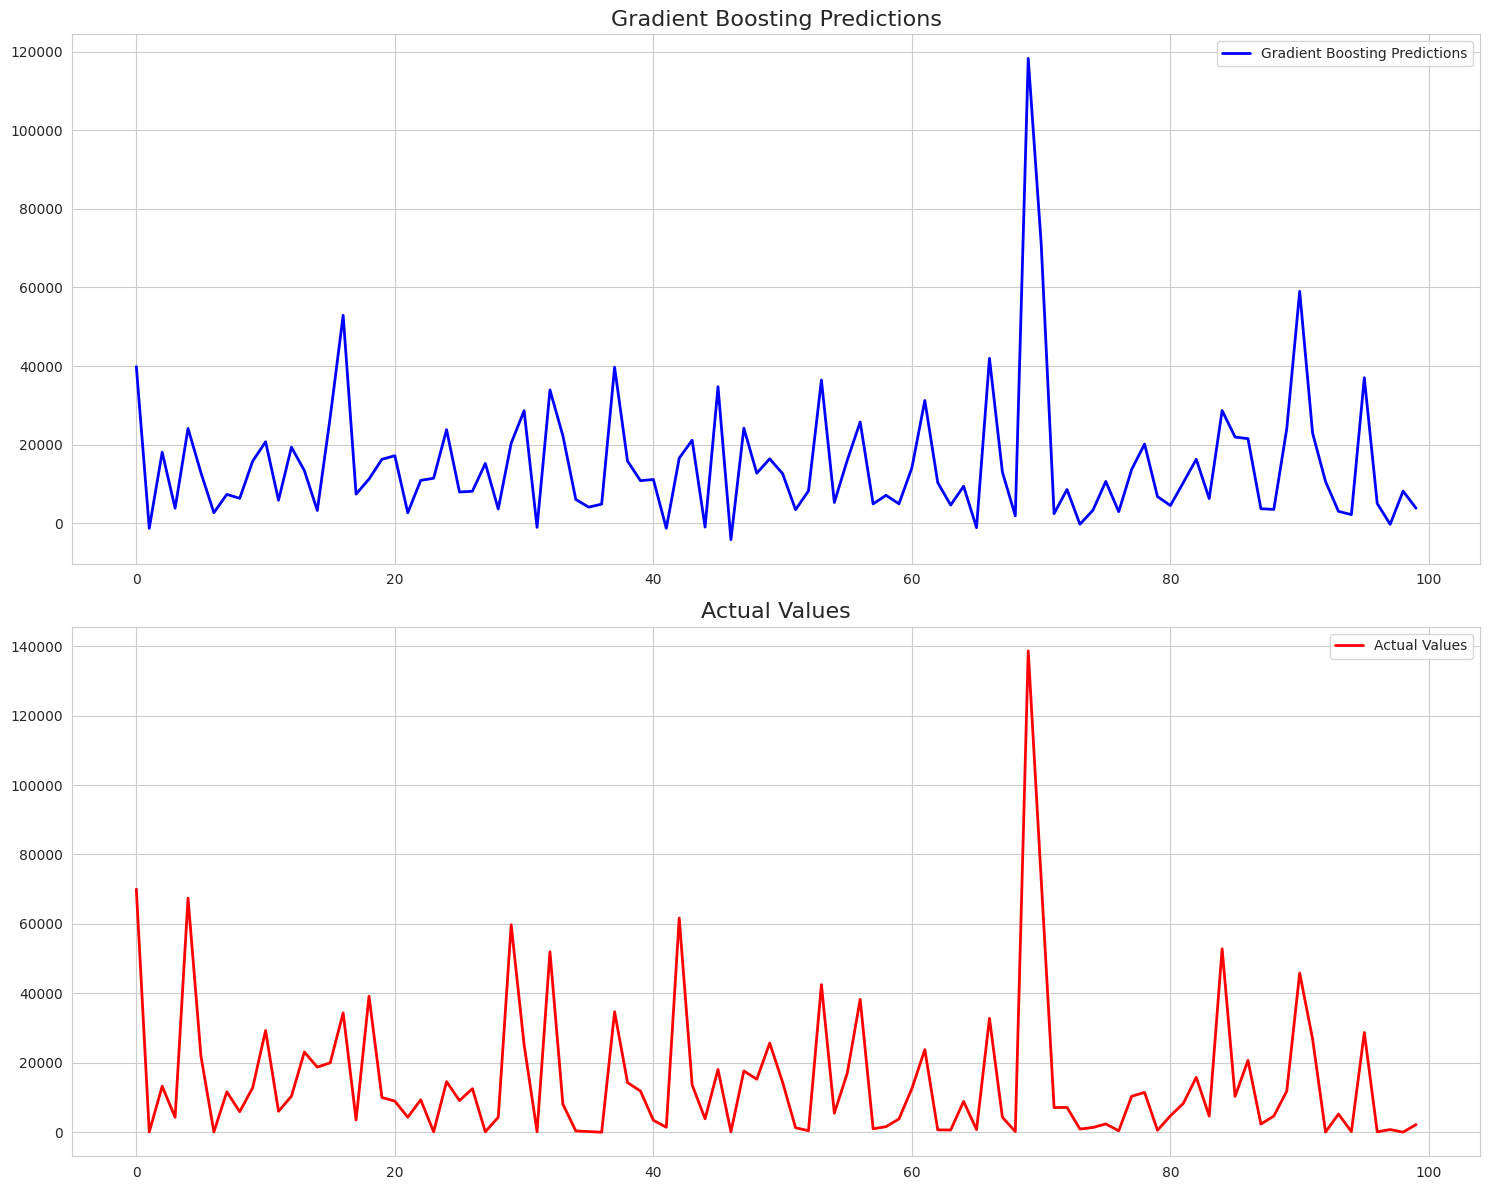

In [160]:
# Select a subset of the test data for visualization
n = 100  # Number of points to plot
y_test_subset = y_test[:n].values

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(15,12))

# First subplot: Gradient Boosting Predictions
ax[0].plot(gb_pred_3[:n], label="Gradient Boosting Predictions", linewidth=2.0, color='blue')
ax[0].set_title('Gradient Boosting Predictions', fontsize=16)
ax[0].legend(loc="best")

# Second subplot: Actual values
ax[1].plot(y_test_subset, label="Actual Values", linewidth=2.0, color='red')
ax[1].set_title('Actual Values', fontsize=16)
ax[1].legend(loc="best")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

**XGB Regressor**

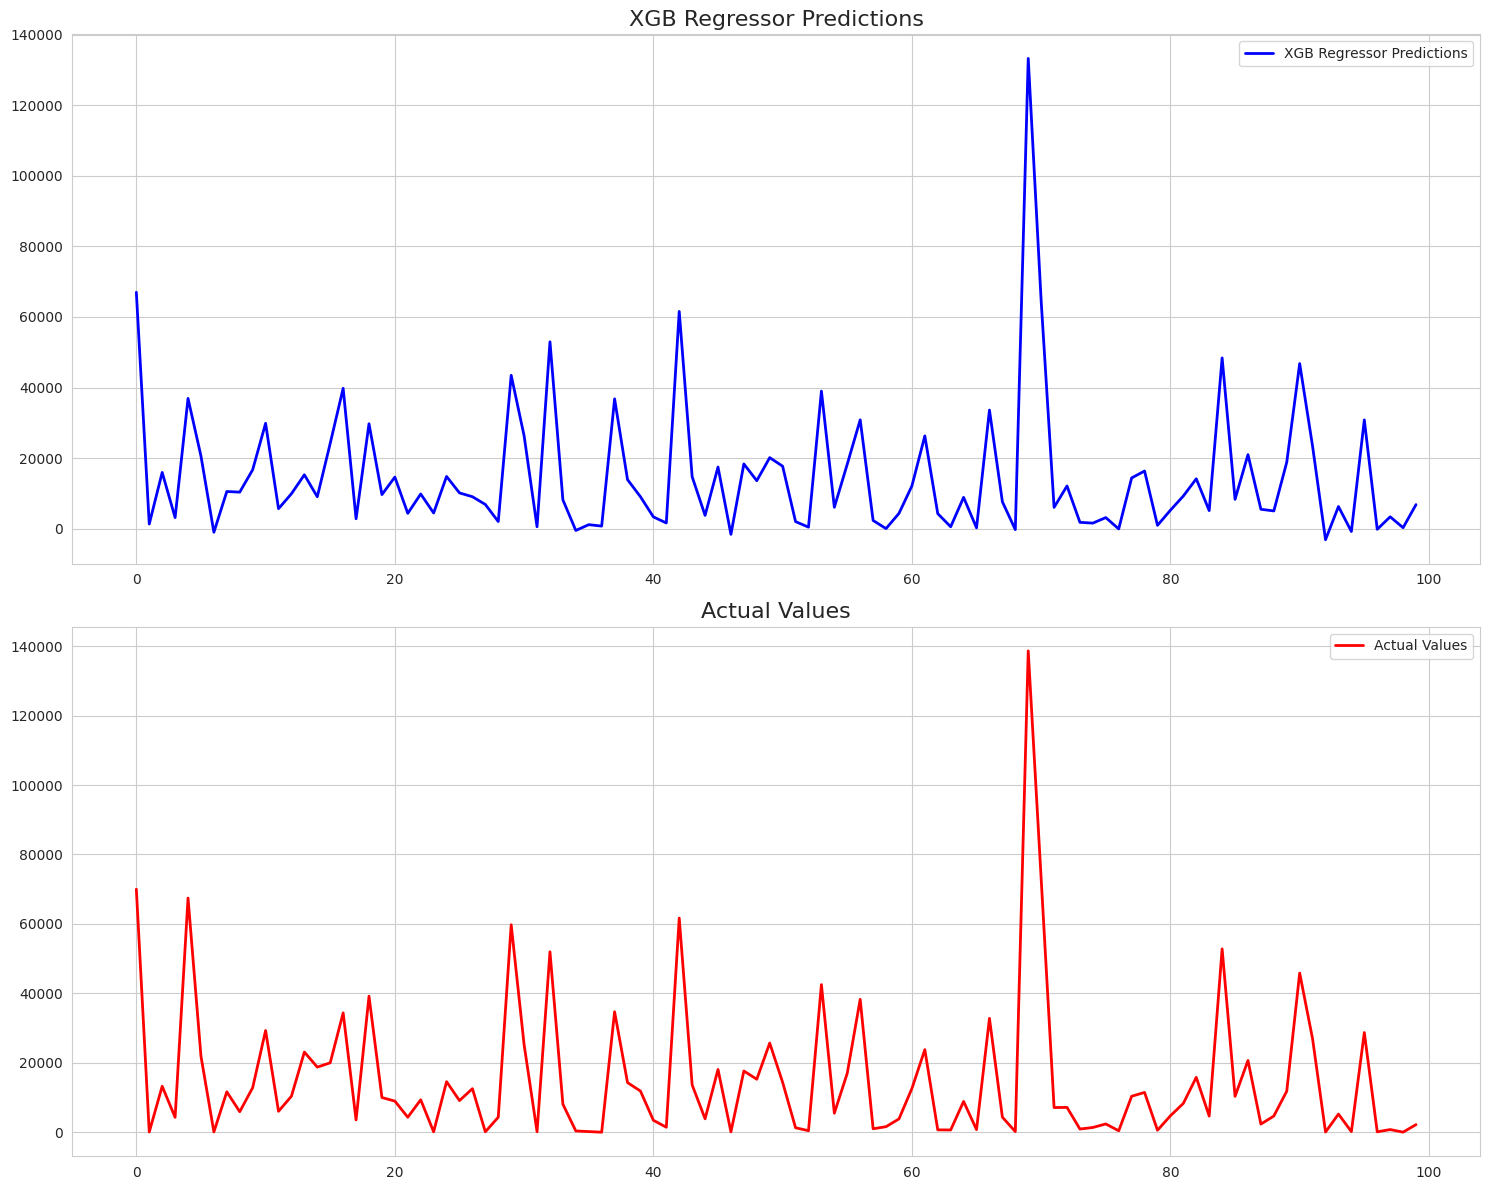

In [161]:
# Select a subset of the test data for visualization
n = 100  # Number of points to plot
y_test_subset = y_test[:n].values

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(15,12))

# First subplot: XGB Regressor Predictions
ax[0].plot(xgb_pred_2[:n], label="XGB Regressor Predictions", linewidth=2.0, color='blue')
ax[0].set_title('XGB Regressor Predictions', fontsize=16)
ax[0].legend(loc="best")

# Second subplot: Actual values
ax[1].plot(y_test_subset, label="Actual Values", linewidth=2.0, color='red')
ax[1].set_title('Actual Values', fontsize=16)
ax[1].legend(loc="best")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-162-434537fb0842>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-162-434537fb0842>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




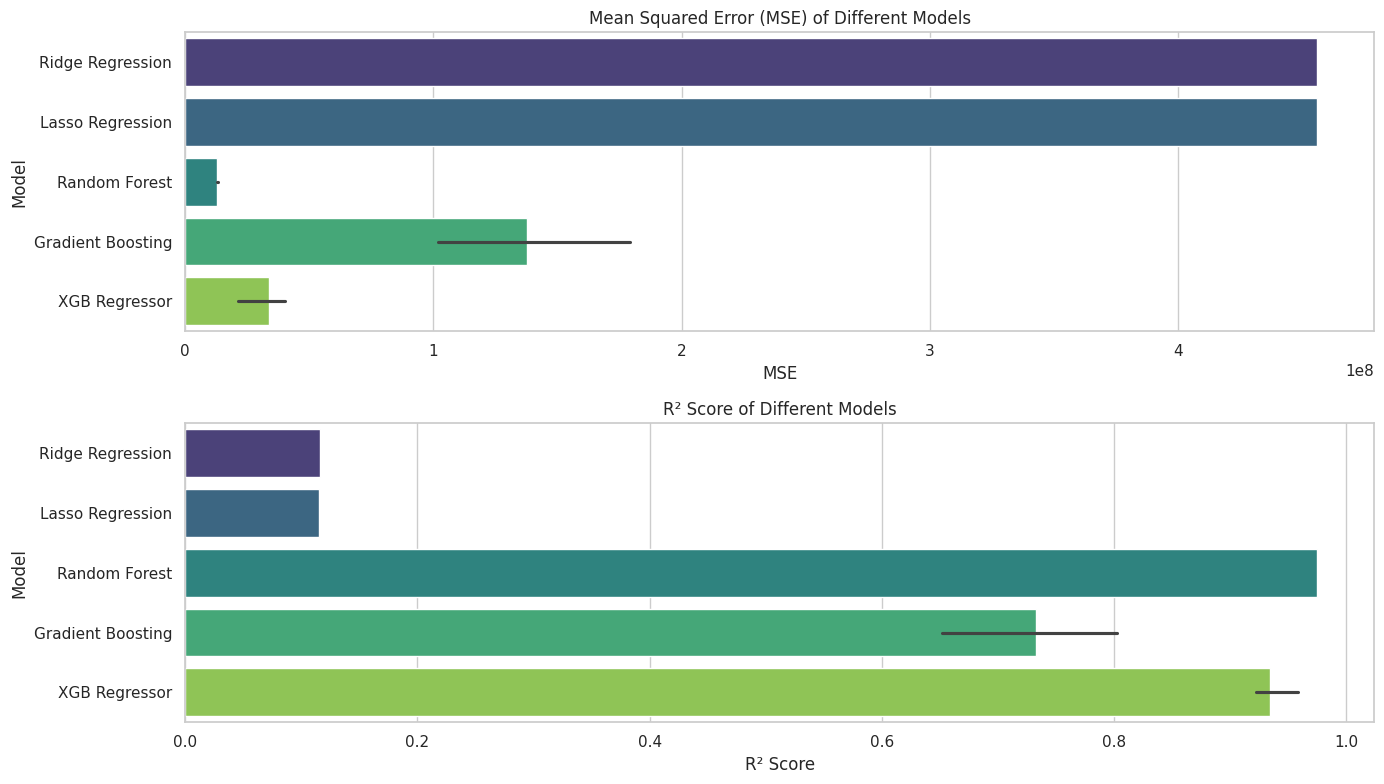

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results = {
    "Model": ["Ridge Regression", "Lasso Regression", "Random Forest", "Random Forest" ,"Random Forest", "Random Forest", "Gradient Boosting", "Gradient Boosting", "Gradient Boosting", "XGB Regressor", "XGB Regressor", "XGB Regressor"],
    "MSE": [ridge_mse, lasso_mse, rf_mse_1, rf_mse_1_100, rf_mse_2, rf_mse_2_100, gb_mse_1, gb_mse_2, gb_mse_3, xgb_mse, xgb_mse_1, xgb_mse_2],
    "R² Score": [ridge_r2, lasso_r2, rf_r2_1, rf_r2_1_100, rf_r2_2, rf_r2_2_100, gb_r2_1, gb_r2_2, gb_r2_3, xgb_r2, xgb_r2_1, xgb_r2_2]
}

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Set the style and size of the plots
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

# Create a bar plot for MSE
plt.subplot(2, 1, 1)
sns.barplot(x="MSE", y="Model", data=results_df, palette="viridis")
plt.title('Mean Squared Error (MSE) of Different Models')
plt.xlabel('MSE')
plt.ylabel('Model')

# Create a bar plot for R² Score
plt.subplot(2, 1, 2)
sns.barplot(x="R² Score", y="Model", data=results_df, palette="viridis")
plt.title('R² Score of Different Models')
plt.xlabel('R² Score')
plt.ylabel('Model')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


**Note:** XGBoost model performs significantly better as it leverages multidimensional data.

# **Feature Engineering**

In [163]:
!pip install shap

In [164]:
import shap
import matplotlib.pyplot as plt
explainer_gb = shap.TreeExplainer(gb_model_1)
shap_values_gb = explainer_gb.shap_values(X_test)

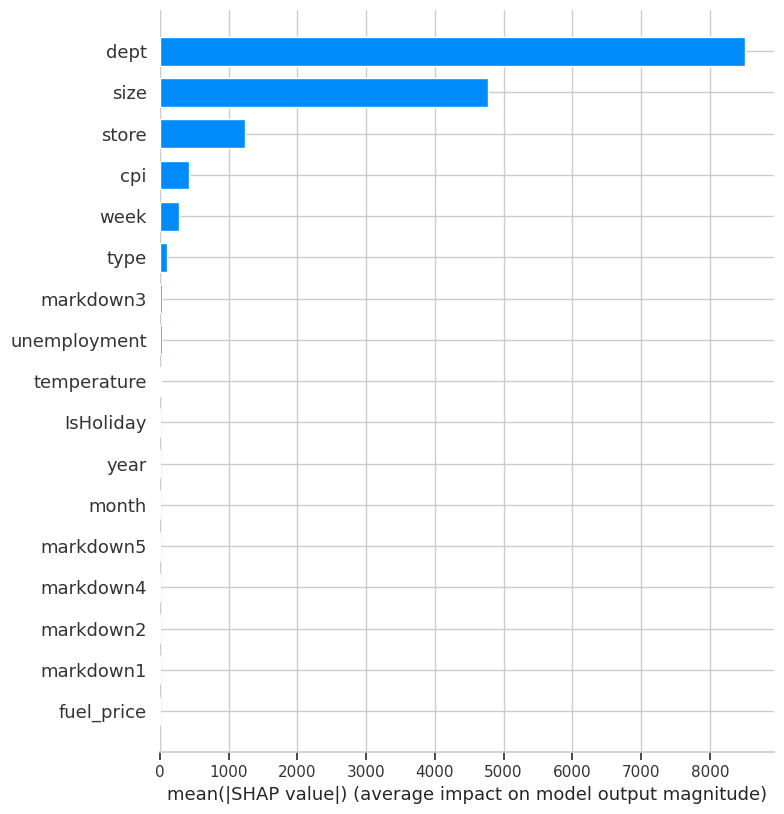

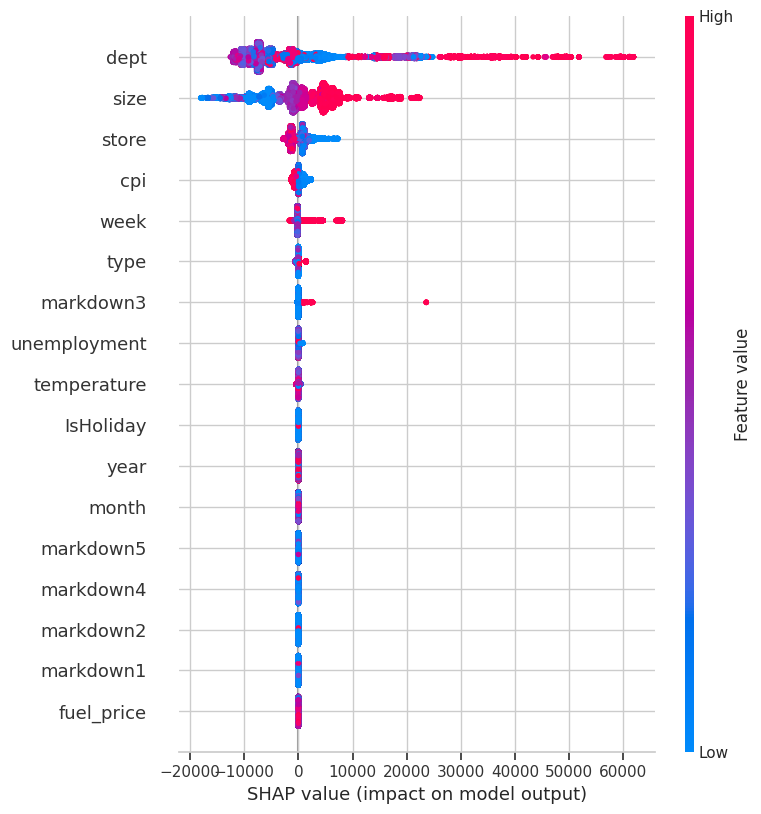

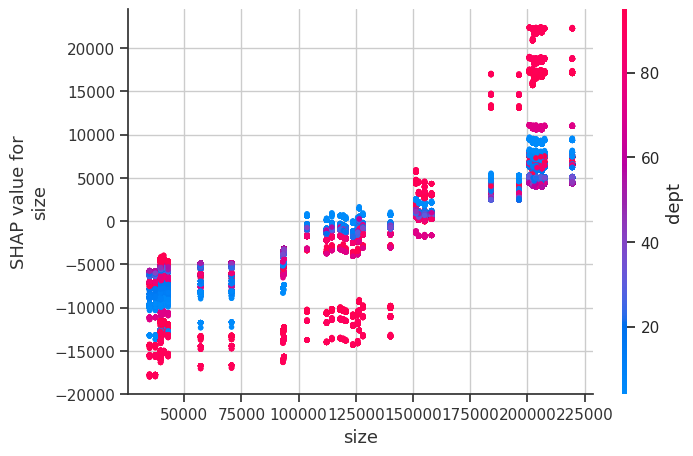

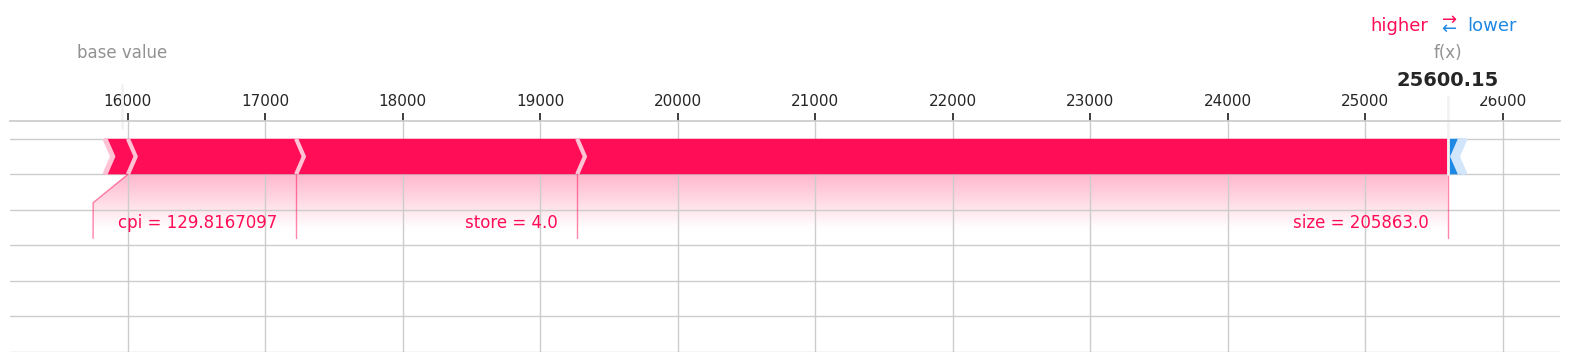

In [165]:
# Visualize the summary plot to understand feature importance and effects
shap.summary_plot(shap_values_gb, X_test, plot_type="bar")  # Bar plot for feature importance

# Detailed summary plot (beeswarm)
shap.summary_plot(shap_values_gb, X_test)

shap.dependence_plot("size", shap_values_gb, X_test)

shap.force_plot(explainer_gb.expected_value, shap_values_gb[0,:], X_test.iloc[0,:], matplotlib=True)

plt.show()

**Removing Low Value Features**

In [166]:
# Example of removing low-importance features
X_train_fxt = X_train.drop(['month', 'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5', 'year'], axis=1)
X_test_fxt = X_test.drop(['month', 'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5', 'year'], axis=1)

In [167]:
X_train_fxt

store         cpi  unemployment  dept  IsHoliday  type    size  week
138466     33  127.087677          9.27    87          1     0   39690    52
289214     26  136.588387          7.60    21          0     0  152513    51
52351      42  126.136065          9.52     1          0     2   39690    22
203504     34  129.049032         10.58    29          0     0  158114    22
233606     34  129.201581         10.64    30          0     0  158114    32
...       ...         ...           ...   ...        ...   ...     ...   ...
259178     16  195.026101          6.23     1          0     1   57197    41
365838     14  191.064610          8.57     6          0     0  200898    25
131932      1  211.405312          7.84    45          0     0  151315    50
146867     43  203.831516         10.40    32          0     2   41062     3
121958     13  126.607200          7.80    55          0     0  219622    46

[337256 rows x 8 columns]

In [168]:
X_test_fxt

store         cpi  unemployment  dept  IsHoliday  type    size  week
272342      4  129.816710          5.14    13          0     0  205863    45
176581     30  214.488691          7.93    42          0     2   42988    13
354212     32  197.588605          8.09    11          0     0  203007    21
281444      3  222.158952          7.20    26          0     1   37392    48
124208     23  132.836933          5.29    14          1     1  114533    47
...       ...         ...           ...   ...        ...   ...     ...   ...
415987     13  131.149968          5.62    20          0     0  219622    42
193068     23  134.514367          4.78    96          0     1  114533    18
346600      4  131.136000          4.31    85          0     0  205863    18
380513     10  130.719581          7.17    34          0     1  126512    30
189348     11  219.023610          7.57    36          0     0  207499    17

[84314 rows x 8 columns]

# **Modelling : After Feature Engineering**

In [170]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [171]:
#Model: Gradient Boosting Regressor
import time
start_time = time.time()
gb_model_1 = GradientBoostingRegressor(n_estimators=50, random_state=42)
gb_model_1.fit(X_train_fxt, y_train)
gb_pred_1 = gb_model_1.predict(X_test_fxt)
gb_mse_1 = mean_squared_error(y_test, gb_pred_1)
gb_r2_1 = r2_score(y_test, gb_pred_1)
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)
print("R^2 VALUE: ", gb_r2_1)

Execution Time:  0.39227139552434287
R^2 VALUE:  0.6485625012424316


In [172]:
start_time = time.time()
gb_model_2 = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model_2.fit(X_train_fxt, y_train)
gb_pred_2 = gb_model_2.predict(X_test_fxt)
gb_mse_2 = mean_squared_error(y_test, gb_pred_2)
gb_r2_2 = r2_score(y_test, gb_pred_2)
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)
print("R^2 VALUE: ", gb_r2_2)

Execution Time:  0.7620493769645691
R^2 VALUE:  0.7422041591026212


In [173]:
start_time = time.time()
gb_model_3 = GradientBoostingRegressor(n_estimators=200, random_state=42)
gb_model_3.fit(X_train_fxt, y_train)
gb_pred_3 = gb_model_3.predict(X_test_fxt)
gb_mse_3 = mean_squared_error(y_test, gb_pred_3)
gb_r2_3 = r2_score(y_test, gb_pred_3)
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)
print("R^2 VALUE: ", gb_r2_3)

Execution Time:  1.5462266643842062
R^2 VALUE:  0.8031918357739974


**LightGBM**

In [174]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize and fit the LightGBM regressor model
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1)
lgb_regressor.fit(X_train, y_train)

# Make predictions
lgb_predictions = lgb_regressor.predict(X_test)

# Calculate R² value using the score method
r2_value_score_method = lgb_regressor.score(X_test, y_test)

# Calculate R² value using the r2_score function
r2_value_function = r2_score(y_test, lgb_predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, lgb_predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, lgb_predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5

print(f"R² value using score method: {r2_value_score_method}")
print(f"R² value using r2_score function: {r2_value_function}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2521
[LightGBM] [Info] Number of data points in the train set: 337256, number of used features: 17
[LightGBM] [Info] Start training from score 15960.785333
R² value using score method: 0.9088740788799162
R² value using r2_score function: 0.9088740788799162
Mean Absolute Error (MAE): 4113.130165637802
Mean Squared Error (MSE): 46986483.97165674
Root Mean Squared Error (RMSE): 6854.66877184133


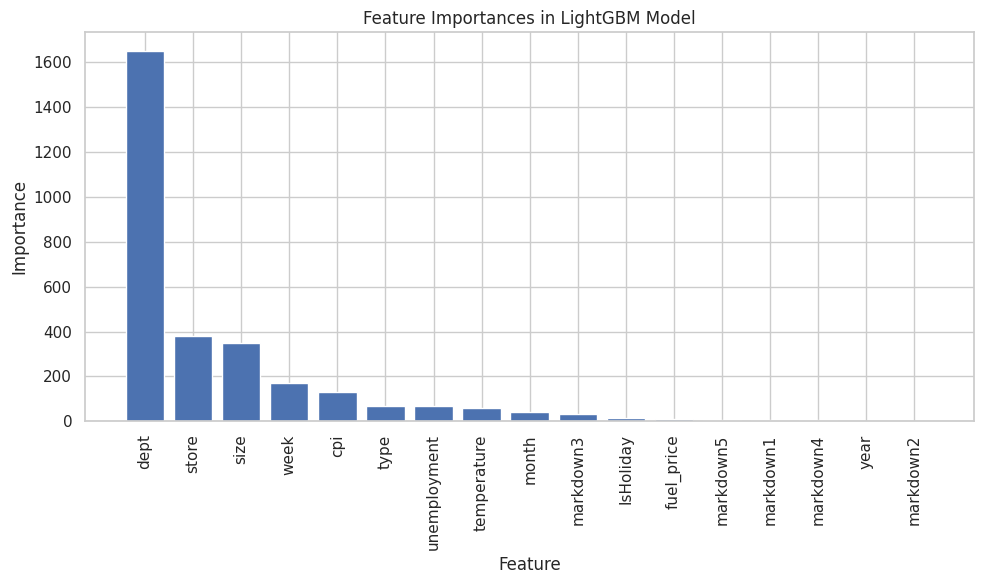

In [175]:
# Get feature importances
feature_importances = lgb_regressor.feature_importances_
features = X_train.columns

# Sort features by importance
indices = np.argsort(feature_importances)[::-1]
sorted_features = features[indices]
sorted_importances = feature_importances[indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), sorted_importances, align='center')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.title('Feature Importances in LightGBM Model')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

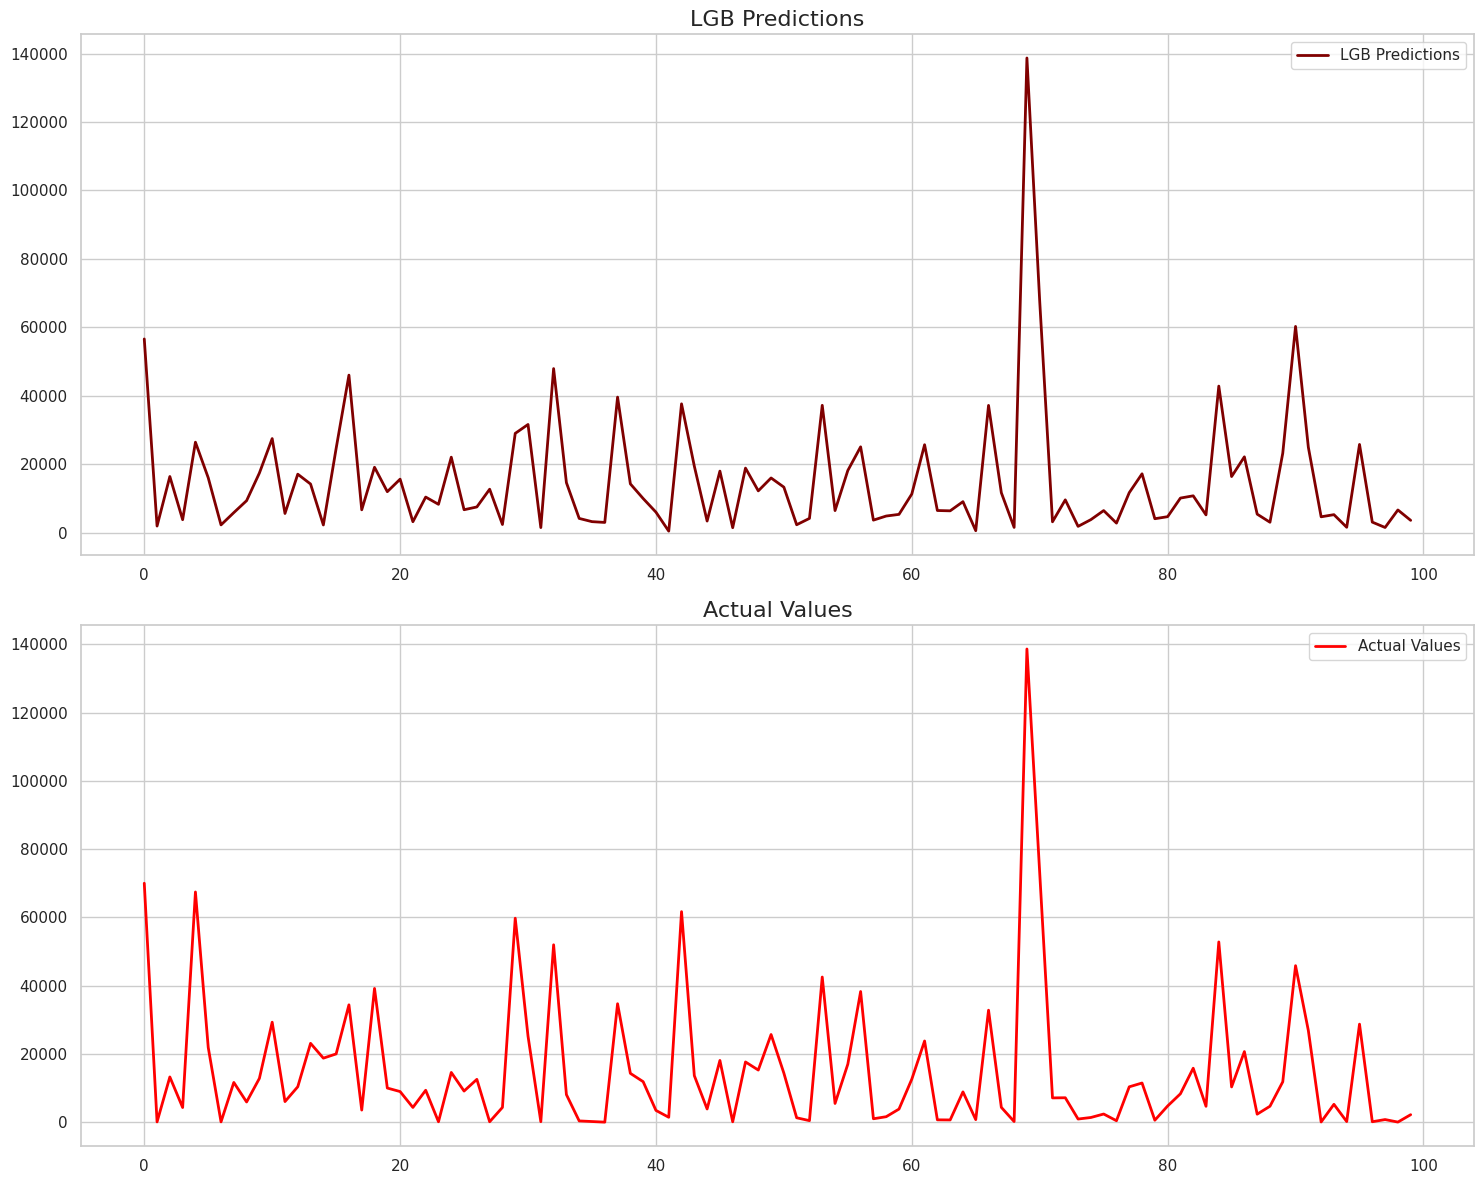

In [176]:
# Select a subset of the test data for visualization
n = 100  # Number of points to plot
y_test_subset = y_test[:n].values

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(15,12))

# First subplot: LGB Predictions
ax[0].plot(lgb_predictions[:n], label="LGB Predictions", linewidth=2.0, color='maroon')
ax[0].set_title('LGB Predictions', fontsize=16)
ax[0].legend(loc="best")

# Second subplot: Actual values
ax[1].plot(y_test_subset, label="Actual Values", linewidth=2.0, color='red')
ax[1].set_title('Actual Values', fontsize=16)
ax[1].legend(loc="best")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## **Forecasting : ARIMA, Modified ARIMA, SARIMA**

# **ARIMA Model**

In [177]:
from statsmodels.tsa.arima.model import ARIMA

In [178]:
data['date'] = pd.to_datetime(data['date'])

# Aggregate the data by week
weekly_sales = data.groupby('date')['weekly_sales'].sum().reset_index()

# Set the date as the index
weekly_sales.set_index('date', inplace=True)

In [179]:
# Define the training period
train = weekly_sales.iloc[:-52]  # Use all but the last year for training
test = weekly_sales.iloc[-52:]   # Use the last year for testing

In [184]:
import warnings
warnings.filterwarnings('ignore')

In [185]:
# Fit the ARIMA model
model = ARIMA(train, order=(5,1,0))  # (p,d,q) parameters can be tuned
model_fit = model.fit()

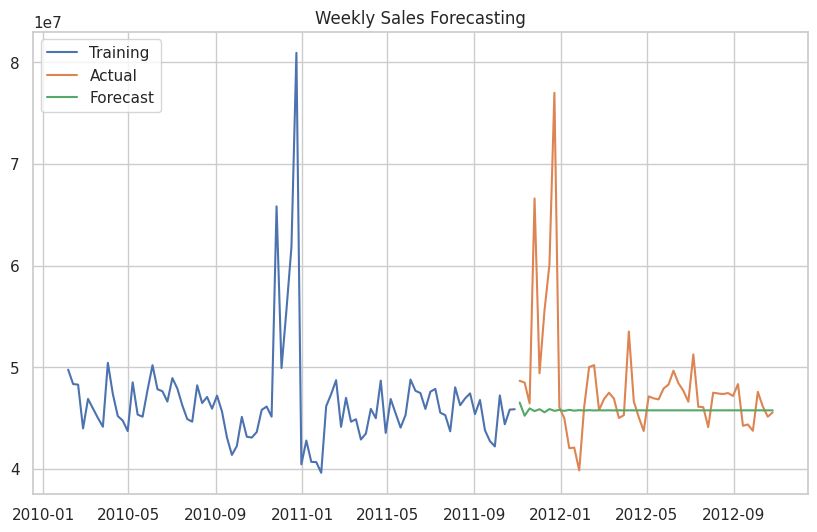

In [186]:
# Forecast for the test period
forecast = model_fit.forecast(steps=len(test))

# Plot the forecast against the actual values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend(loc='upper left')
plt.title('Weekly Sales Forecasting')
plt.show()

**Tuning ARIMA Model**

In [187]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np

data['date'] = pd.to_datetime(data['date'])

# Aggregate the data by week
weekly_sales = data.groupby('date')['weekly_sales'].sum().reset_index()

# Set the date as the index
weekly_sales.set_index('date', inplace=True)

# Define the training period
train = weekly_sales.iloc[:-52]  # Use all but the last year for training
test = weekly_sales.iloc[-52:]   # Use the last year for testing

# Grid search for ARIMA parameters
best_aic = np.inf
best_order = None
best_model = None

# Define a range of p, d, q values to try
p_values = range(0, 6)
d_values = range(0, 2)
q_values = range(0, 6)

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(train, order=(p, d, q))
                model_fit = model.fit()
                aic = model_fit.aic
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
                    best_model = model_fit
            except Exception as e:
                continue

print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")

# Use the best model for predictions
predictions = best_model.forecast(steps=len(test))

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print(f"RMSE for best ARIMA model: {rmse}")

Best ARIMA order: (0, 1, 5) with AIC: 3050.9341382069338
RMSE for best ARIMA model: 6263405.37778519


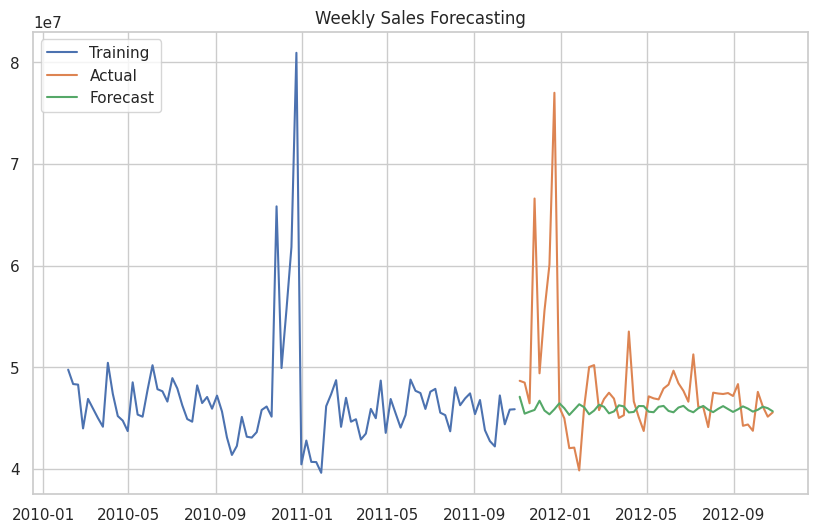

In [188]:
# Forecast for the test period
forecast = model_fit.forecast(steps=len(test))

# Plot the forecast against the actual values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend(loc='upper left')
plt.title('Weekly Sales Forecasting')
plt.show()

# **SARIMA Model**

In [189]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

data['date'] = pd.to_datetime(data['date'])

# Aggregate the data by week
weekly_sales = data.groupby('date')['weekly_sales'].sum().reset_index()

# Set the date as the index
weekly_sales.set_index('date', inplace=True)

# Define the training period
train = weekly_sales.iloc[:-52]
test = weekly_sales.iloc[-52:]

# Grid search for ARIMA/SARIMA parameters
best_aic = np.inf
best_order = None
best_seasonal_order = None
best_model = None

# Define a range of p, d, q values to try
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
S = 52  # Assuming weekly seasonality

for p in tqdm(p_values):
    for d in d_values:
        for q in q_values:
            for P in P_values:
                for D in D_values:
                    for Q in Q_values:
                        try:
                            model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, S), enforce_stationarity=False, enforce_invertibility=False)
                            model_fit = model.fit(disp=False)
                            aic = model_fit.aic
                            if aic < best_aic:
                                best_aic = aic
                                best_order = (p, d, q)
                                best_seasonal_order = (P, D, Q, S)
                                best_model = model_fit
                        except Exception as e:
                            continue

print(f"Best SARIMA order: {best_order} with seasonal order: {best_seasonal_order} and AIC: {best_aic}")

# Walk-forward validation
predictions = []
for i in range(len(test)):
    train_data = weekly_sales.iloc[:-(52-i)]
    model = SARIMAX(train_data, order=best_order, seasonal_order=best_seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=1)
    predictions.append(forecast.values[0])

# Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print(f"RMSE for best SARIMA model: {rmse}")

100%|██████████| 3/3 [02:36<00:00, 52.11s/it]


Best SARIMA order: (0, 0, 0) with seasonal order: (0, 1, 1, 52) and AIC: 4.0
RMSE for best SARIMA model: 2128341.295087557


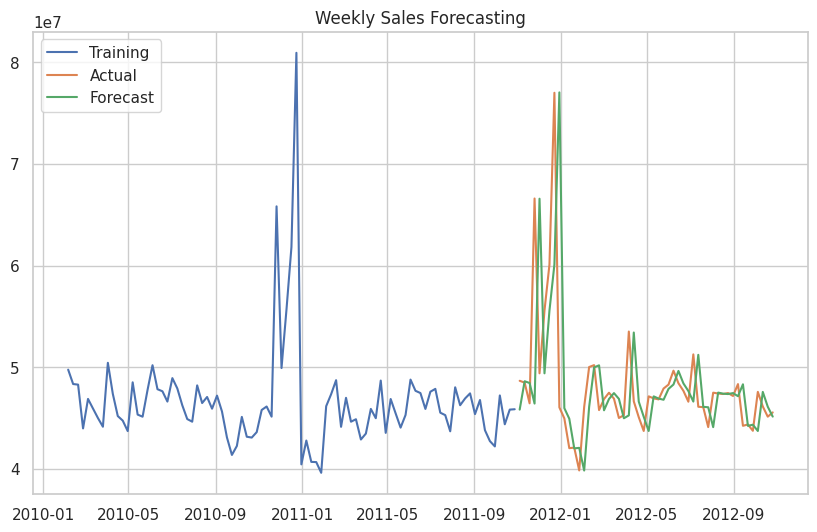

In [190]:
# Forecast for the test period
forecast = model_fit.forecast(steps=len(test))

# Plot the forecast against the actual values
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend(loc='upper left')
plt.title('Weekly Sales Forecasting')
plt.show()

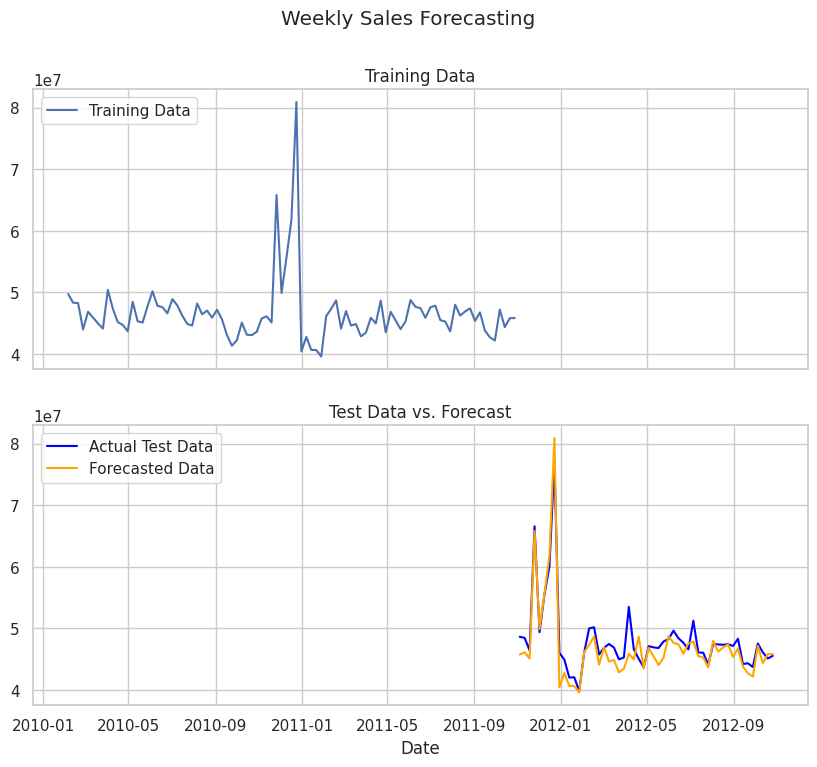

In [191]:
import matplotlib.pyplot as plt

# Forecast for the test period
forecast = best_model.forecast(steps=len(test))

# Plot the training and test data with forecasts in two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Upper subplot for training data
ax1.plot(train.index, train, label='Training Data')
ax1.set_title('Training Data')
ax1.legend(loc='upper left')

# Lower subplot for test data and forecasts
ax2.plot(test.index, test, label='Actual Test Data', color='blue')
ax2.plot(test.index, forecast, label='Forecasted Data', color='orange')
ax2.set_title('Test Data vs. Forecast')
ax2.legend(loc='upper left')

# Set common x-axis label and overall title
fig.suptitle('Weekly Sales Forecasting')
plt.xlabel('Date')
plt.show()

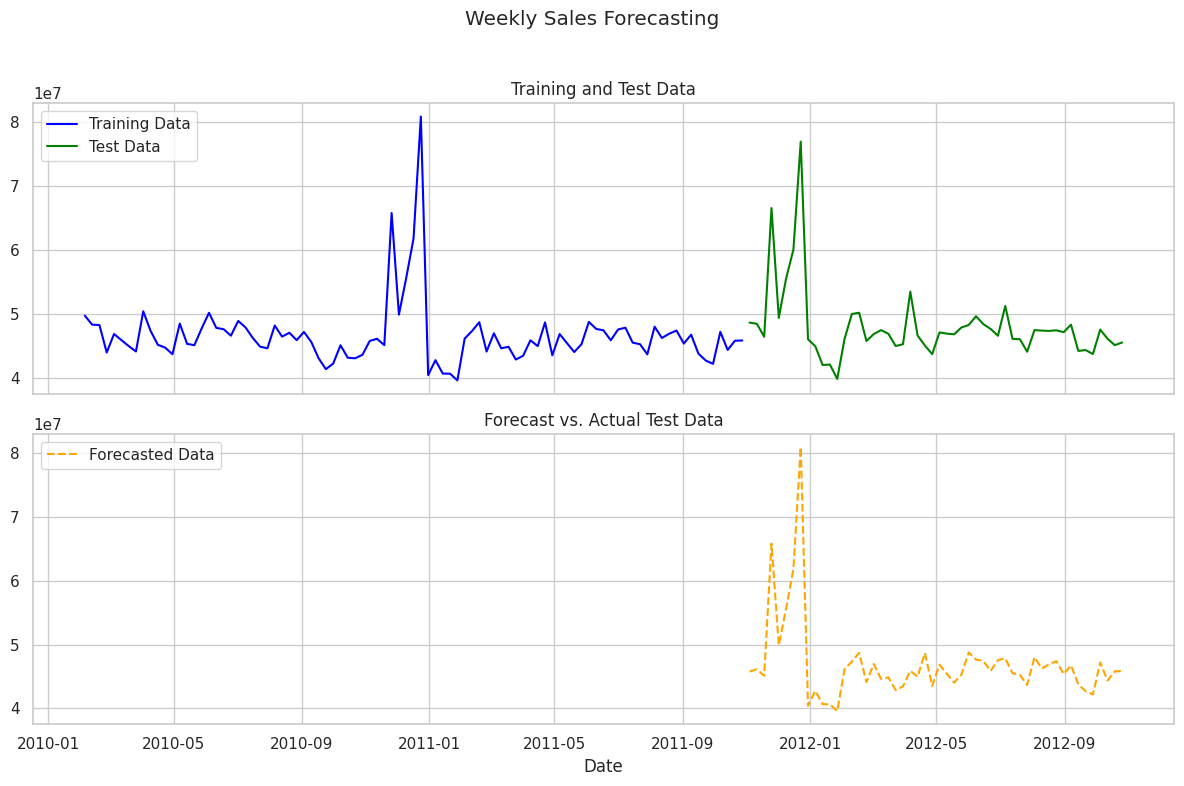

In [192]:
# Forecast for the test period
forecast = best_model.forecast(steps=len(test))

# Plot the training and test data in the upper plot, and forecast vs. actual test data in the lower plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Upper subplot for training and test data
ax1.plot(train.index, train, label='Training Data', color='blue')
ax1.plot(test.index, test, label='Test Data', color='green')
ax1.set_title('Training and Test Data')
ax1.legend(loc='upper left')

# Lower subplot for forecast vs. actual test data
# ax2.plot(test.index, test, label='Actual Test Data', color='green')
ax2.plot(test.index, forecast, label='Forecasted Data', color='orange', linestyle='--')
ax2.set_title('Forecast vs. Actual Test Data')
ax2.legend(loc='upper left')

# Set common labels
fig.suptitle('Weekly Sales Forecasting')
plt.xlabel('Date')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [193]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(test, predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))

# Calculate MAPE
mape = np.mean(np.abs((test.values - predictions) / test.values)) * 100

# Calculate Accuracy as a Percentage (1 - MAPE/100)
accuracy_percentage = 100 - mape

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"Accuracy: {accuracy_percentage}%")

Mean Absolute Error (MAE): 1597388.9843533235
Root Mean Squared Error (RMSE): 2128341.295087557
Mean Absolute Percentage Error (MAPE): 10.139488649093506%
Accuracy: 89.86051135090649%
